# Section 0 问题描述与完成项目流程

## 1. 问题描述


<img src="default.png" width="20%"></img>

在该项目中，你将使用强化学习算法，实现一个自动走迷宫机器人。

1. 如上图所示，智能机器人显示在右上角。在我们的迷宫中，有陷阱（红色炸弹）及终点（蓝色的目标点）两种情景。机器人要尽量避开陷阱、尽快到达目的地。
2. 小车可执行的动作包括：向上走 `u`、向右走 `r`、向下走 `d`、向左走 `l`。
3. 执行不同的动作后，根据不同的情况会获得不同的奖励，具体而言，有以下几种情况。
    - 撞到墙壁：-10
    - 走到终点：50
    - 走到陷阱：-30
    - 其余情况：-0.1
4. 我们需要通过修改 `robot.py` 中的代码，来实现一个 Q Learning 机器人，实现上述的目标。

## 2. 完成项目流程

1. 配置环境，使用 `envirnment.yml` 文件配置名为 `robot-env` 的 conda 环境，具体而言，你只需转到当前的目录，在命令行/终端中运行如下代码，稍作等待即可。
```
conda env create -f envirnment.yml
```
安装完毕后，在命令行/终端中运行 `source activate robot-env`（Mac/Linux 系统）或 `activate robot-env`（Windows 系统）激活该环境。

2. 阅读 `main.ipynb` 中的指导完成项目，并根据指导修改对应的代码，生成、观察结果。
3. 导出代码与报告，上传文件，提交审阅并优化。
---

---

# Section 1 算法理解


## 1. 1 强化学习总览

强化学习作为机器学习算法的一种，其模式也是让智能体在“训练”中学到“经验”，以实现给定的任务。但不同于监督学习与非监督学习，在强化学习的框架中，我们更侧重通过智能体与环境的**交互**来学习。通常在监督学习和非监督学习任务中，智能体往往需要通过给定的训练集，辅之以既定的训练目标（如最小化损失函数），通过给定的学习算法来实现这一目标。然而在强化学习中，智能体则是通过其与环境交互得到的奖励进行学习。这个环境可以是虚拟的（如虚拟的迷宫），也可以是真实的（自动驾驶汽车在真实道路上收集数据）。


在强化学习中有五个核心组成部分，它们分别是：**环境（Environment）**、**智能体（Agent）**、**状态（State）**、**动作（Action）**和**奖励（Reward）**。在某一时间节点 $t$：
    
- 智能体在从环境中感知其所处的状态 $s_t$
- 智能体根据某些准则选择动作 $a_t$
- 环境根据智能体选择的动作，向智能体反馈奖励 $r_{t+1}$

通过合理的学习算法，智能体将在这样的问题设置下，成功学到一个在状态 $s_t$ 选择动作 $a_t$ 的策略 $\pi (s_t) = a_t$。

---

**问题 1**：请参照如上的定义，描述出 “机器人走迷宫这个问题” 中强化学习五个组成部分对应的实际对象：

- **环境** : 迷宫及其中的互动元素，包括墙、终点、陷阱、空地等。根据机器人当前的状态$s_t$及采取的动作$a_t$，环境反馈奖励$r_{t+1}$和下一个状态$s_{t+1}$，如机器人向左移动，并踩到陷阱，环境反馈-30和新的位置。
- **状态** : 机器人所处的位置


- **动作** : 向上走 u、向右走 r、向下走 d、向左走 l
- **奖励** : 撞到墙壁：-10；走到终点：50；走到陷阱：-30；其余情况：-0.1

$$T(s^{'}, a, s) = P(s^{'}|a,s)$$


---

## 1.2 计算 Q 值 

在我们的项目中，我们要实现基于 Q-Learning 的强化学习算法。Q-Learning 是一个值迭代（Value Iteration）算法。与策略迭代（Policy Iteration）算法不同，值迭代算法会计算每个”状态“或是”状态-动作“的值（Value）或是效用（Utility），然后在执行动作的时候，会设法最大化这个值。因此，对每个状态值的准确估计，是我们值迭代算法的核心。通常我们会考虑**最大化动作的长期奖励**，即不仅考虑当前动作带来的奖励，还会考虑动作长远的奖励。

在 Q-Learning 算法中，我们把这个长期奖励记为 Q 值，我们会考虑每个 ”状态-动作“ 的 Q 值，具体而言，它的计算公式为：

$$
q(s_{t},a) = R_{t+1} + \gamma \times\max_a q(a,s_{t+1})
$$

也就是对于当前的“状态-动作” $(s_{t},a)$，我们考虑执行动作 $a$ 后环境给我们的奖励 $R_{t+1}$，以及执行动作 $a$ 到达 $s_{t+1}$后，执行任意动作能够获得的最大的Q值 $\max_a q(a,s_{t+1})$，$\gamma$ 为折扣因子。

不过一般地，我们使用更为保守地更新 Q 表的方法，即引入松弛变量 $alpha$，按如下的公式进行更新，使得 Q 表的迭代变化更为平缓。

$$
q(s_{t},a) = (1-\alpha) \times q(s_{t},a) + \alpha \times(R_{t+1} + \gamma \times\max_a q(a,s_{t+1}))
$$



---
<img src="default2.png" width="20%"></img>

**问题 2**：根据已知条件求 $q(s_{t},a)$，在如下模板代码中的空格填入对应的数字即可。


已知：如上图，机器人位于 $s_1$，行动为 `u`，行动获得的奖励与题目的默认设置相同。在 $s_2$ 中执行各动作的 Q 值为：`u`: -24，`r`: -13，`d`: -0.29、`l`: +40，$\gamma$ 取0.9。


$$
\begin{align}
q(s_{t},a) & = R_{t+1} + \gamma \times\max_a q(a,s_{t+1}) \\
 & =-0.1 + 0.9*40 \\
 & =35.9
\end{align}
$$


---

## 1.3 如何选择动作

在强化学习中，「探索-利用」问题是非常重要的问题。具体来说，根据上面的定义，我们会尽可能地让机器人在每次选择最优的决策，来最大化长期奖励。但是这样做有如下的弊端：
1. 在初步的学习中，我们的 Q 值会不准确，如果在这个时候都按照 Q 值来选择，那么会造成错误。
2. 学习一段时间后，机器人的路线会相对固定，则机器人无法对环境进行有效的探索。

因此我们需要一种办法，来解决如上的问题，增加机器人的探索。由此我们考虑使用 epsilon-greedy 算法，即在小车选择动作的时候，以一部分的概率随机选择动作，以一部分的概率按照最优的 Q 值选择动作。同时，这个选择随机动作的概率应当随着训练的过程逐步减小。

---

**问题 3**：在如下的代码块中，实现 epsilon-greedy 算法的逻辑，并运行测试代码。

In [1]:
qline = {'u':1.2, 'r':-2.1, 'd':-24.5, 'l':27}
action1 = max(qline, key=lambda x:qline[x])
action2 = max(zip(qline.values(), qline.keys()))[1]
print(action1, action2)

l l


In [7]:
import random

actions = ['u','r','d','l']
qline = {'u':1.2, 'r':-2.1, 'd':-24.5, 'l':27}
epsilon = 0.3 # 以0.3的概率进行随机选择

def choose_action(epsilon):
    action = None
    if random.random() < 0.3: # 以某一概率
        # 实现对动作的随机选择
        action = random.choice(actions)
    else: 
        # 否则选择具有最大 Q 值的动作
        action = max(qline, key=lambda x:qline[x])
#         action = max(zip(qline.values(), qline.keys()))[1]
    return action

for _ in range(10):
    print('epsilon greedy choose action: {}'.format(choose_action(epsilon)))

epsilon greedy choose action: l
epsilon greedy choose action: l
epsilon greedy choose action: l
epsilon greedy choose action: l
epsilon greedy choose action: l
epsilon greedy choose action: d
epsilon greedy choose action: l
epsilon greedy choose action: l
epsilon greedy choose action: r
epsilon greedy choose action: u


---

---

# Section 2 代码实现

## 2.1. `Maze` 类理解

我们首先引入了迷宫类 `Maze`，这是一个非常强大的函数，它能够根据你的要求随机创建一个迷宫，或者根据指定的文件，读入一个迷宫地图信息。

1. 使用 `Maze("file_name")` 根据指定文件创建迷宫，或者使用 `Maze(maze_size=(height,width))` 来随机生成一个迷宫。
2. 使用 `trap_number` 参数，在创建迷宫的时候，设定迷宫中陷阱的数量。
3. 直接键入迷宫变量的名字按回车，展示迷宫图像（如 `g=Maze("xx.txt")`，那么直接输入 `g` 即可。
4. 建议生成的迷宫尺寸，长在 6~12 之间，宽在 10～12 之间。

---

**问题 4**：在如下的代码块中，创建你的迷宫并展示。

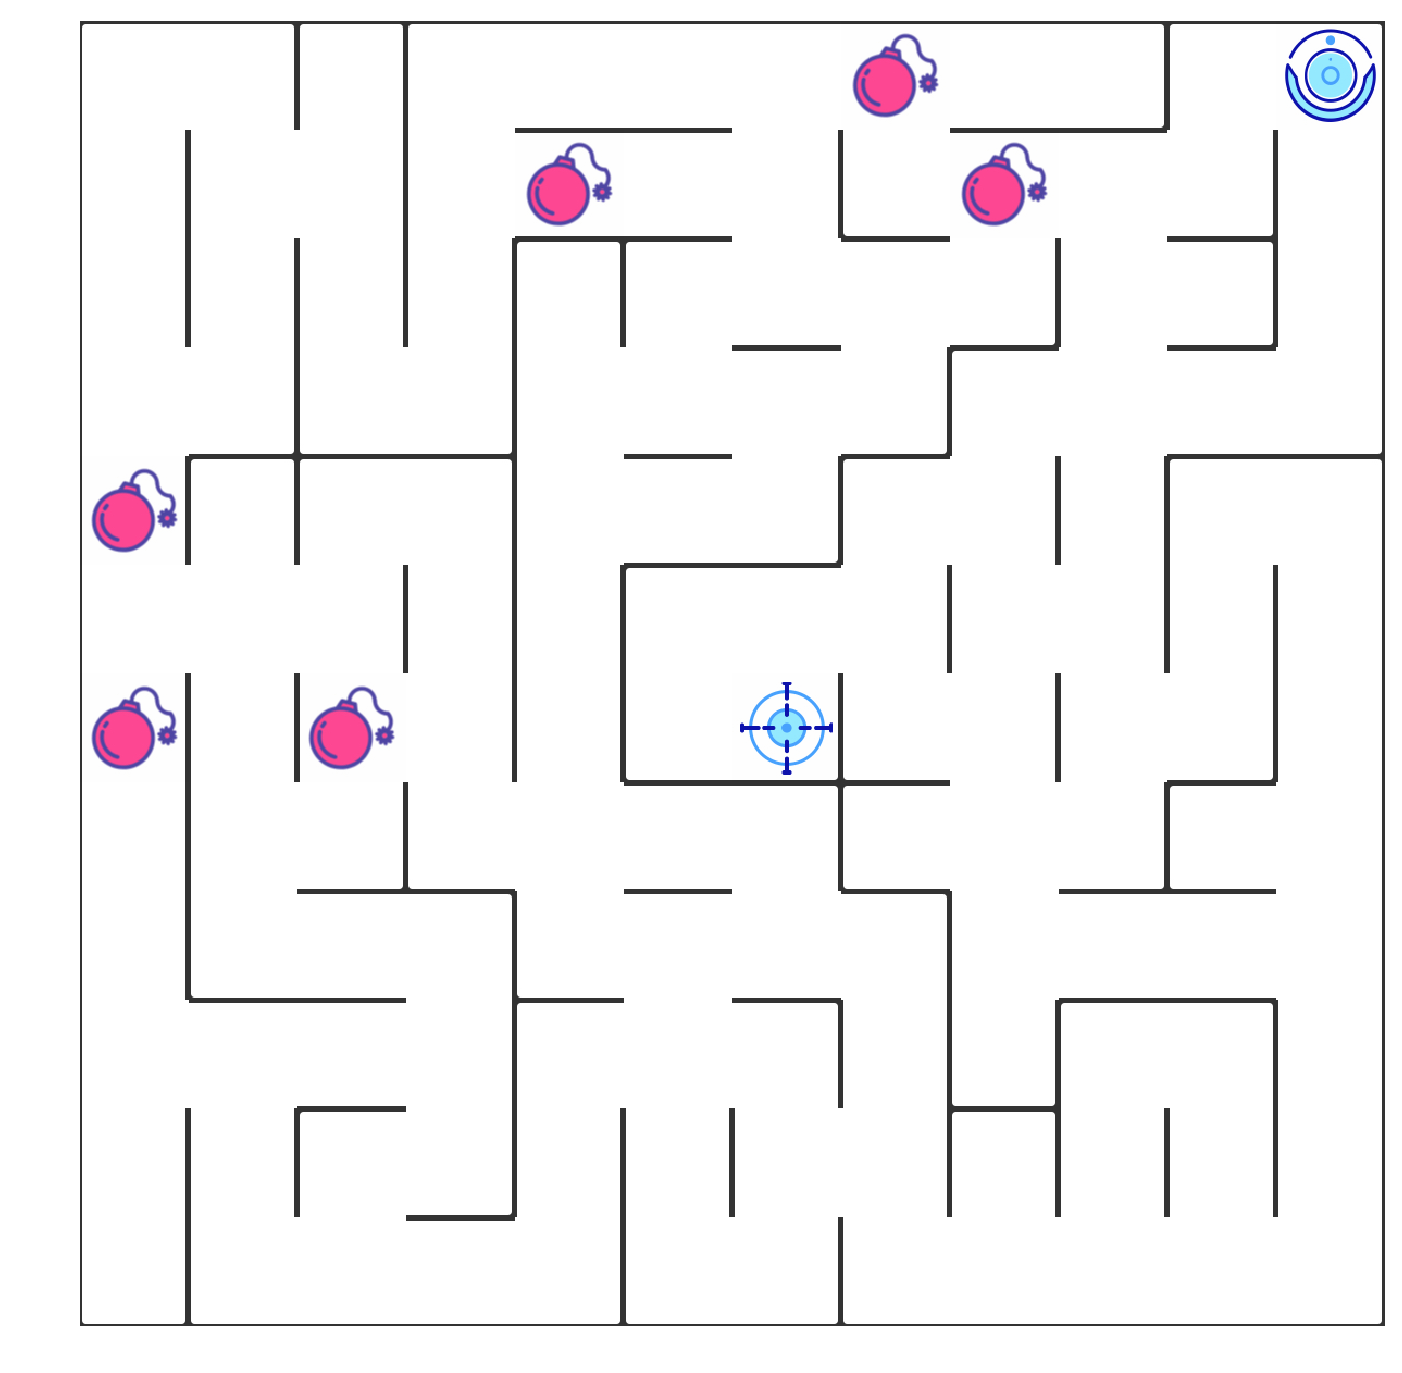

Maze of size (12, 12)


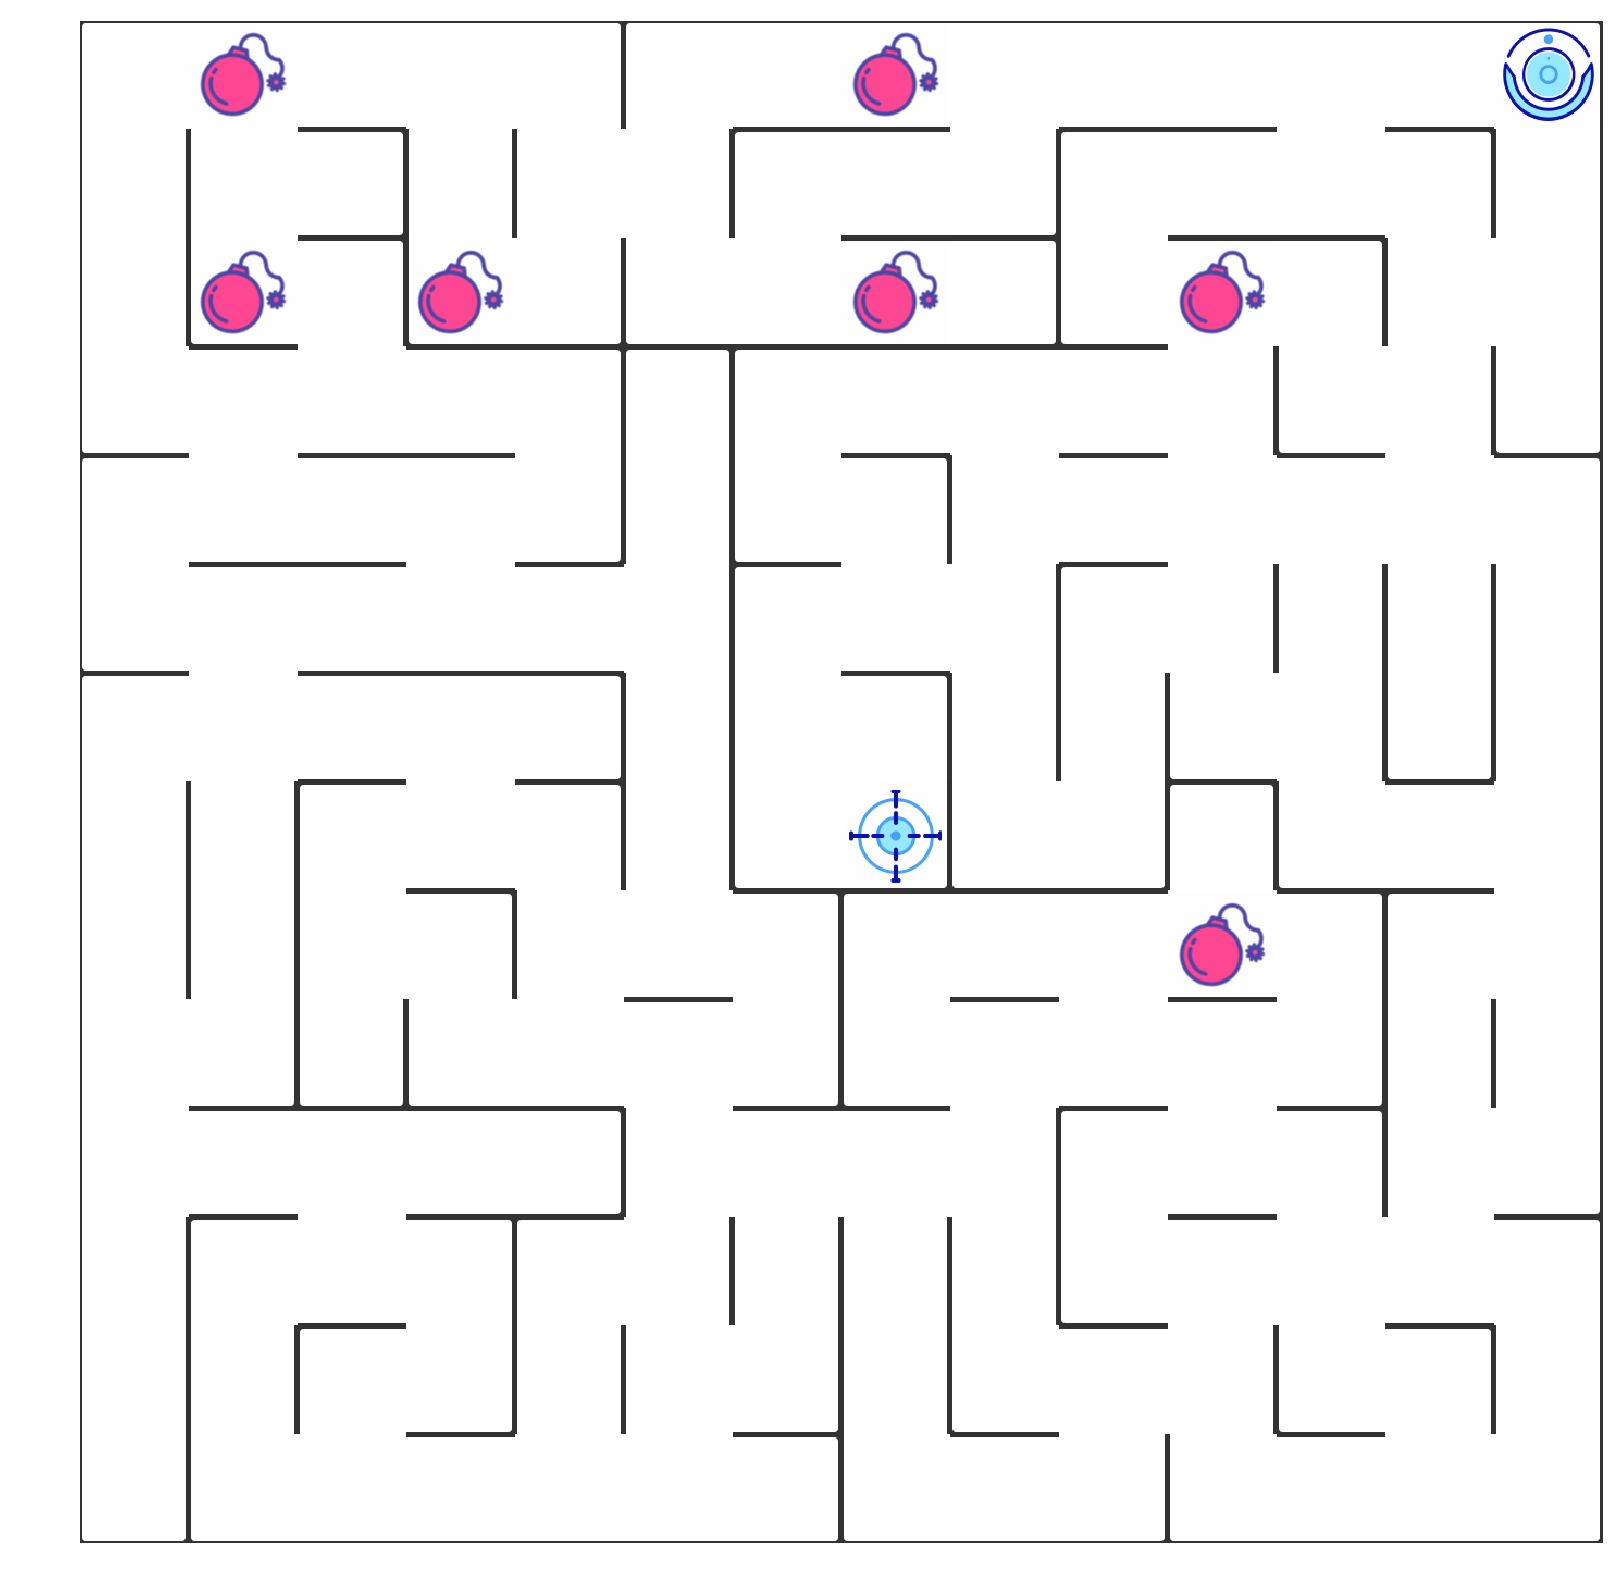

Maze of size (14, 14)


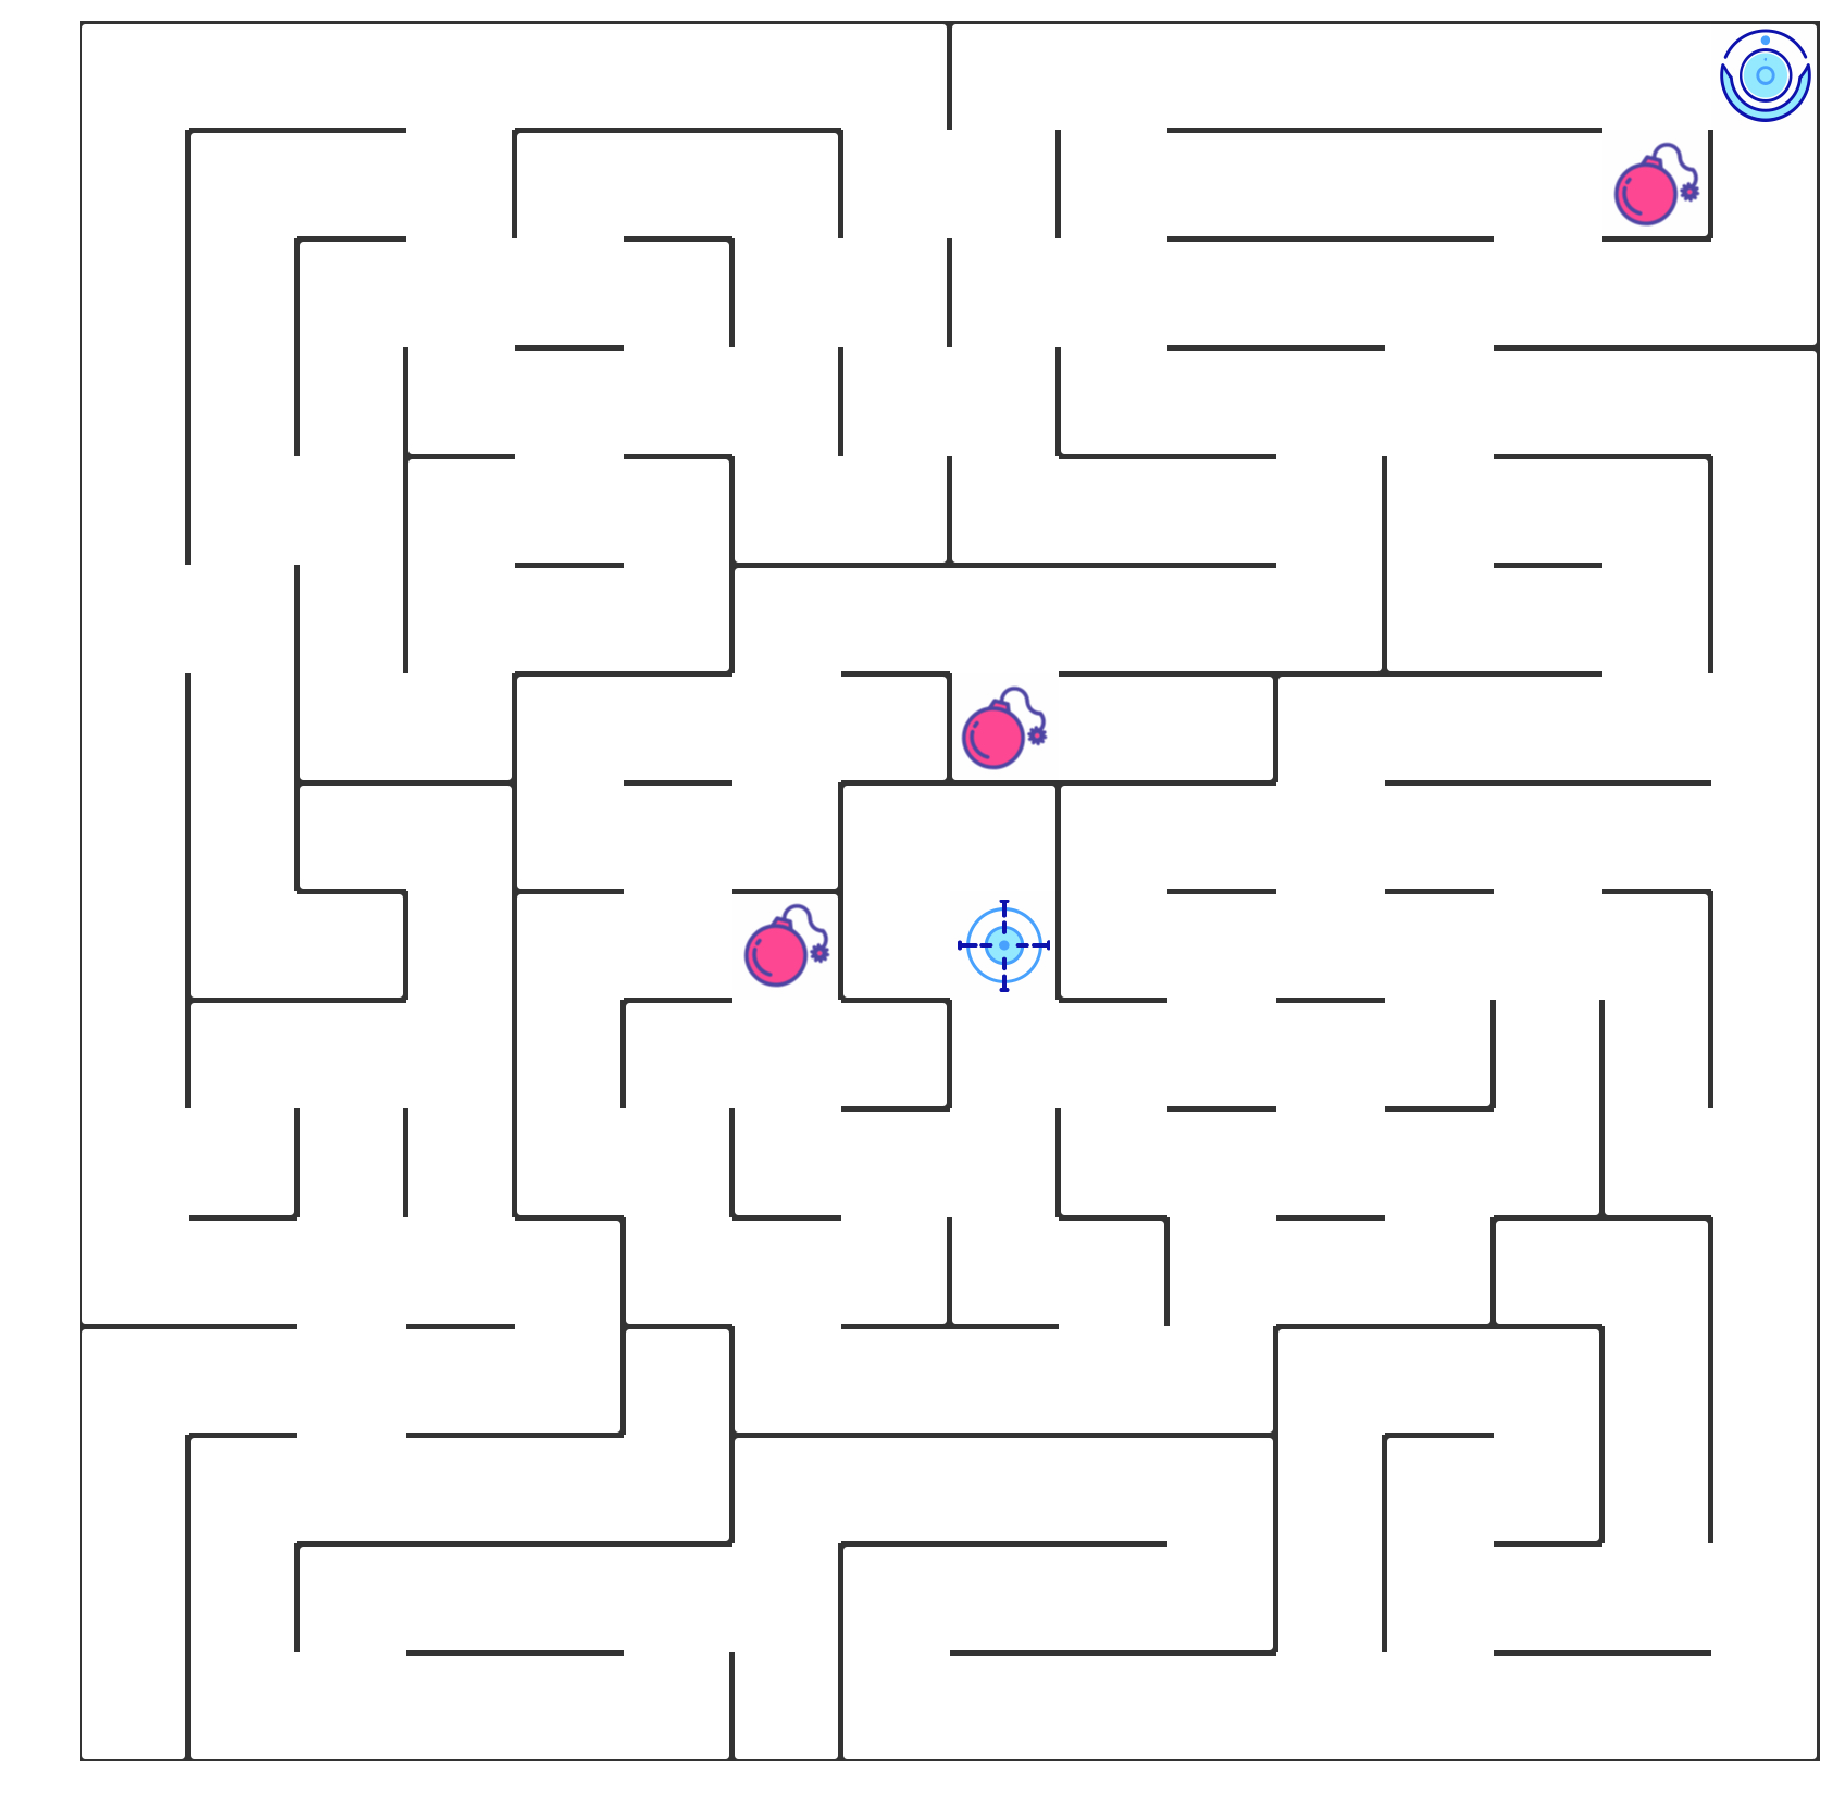

Maze of size (16, 16)


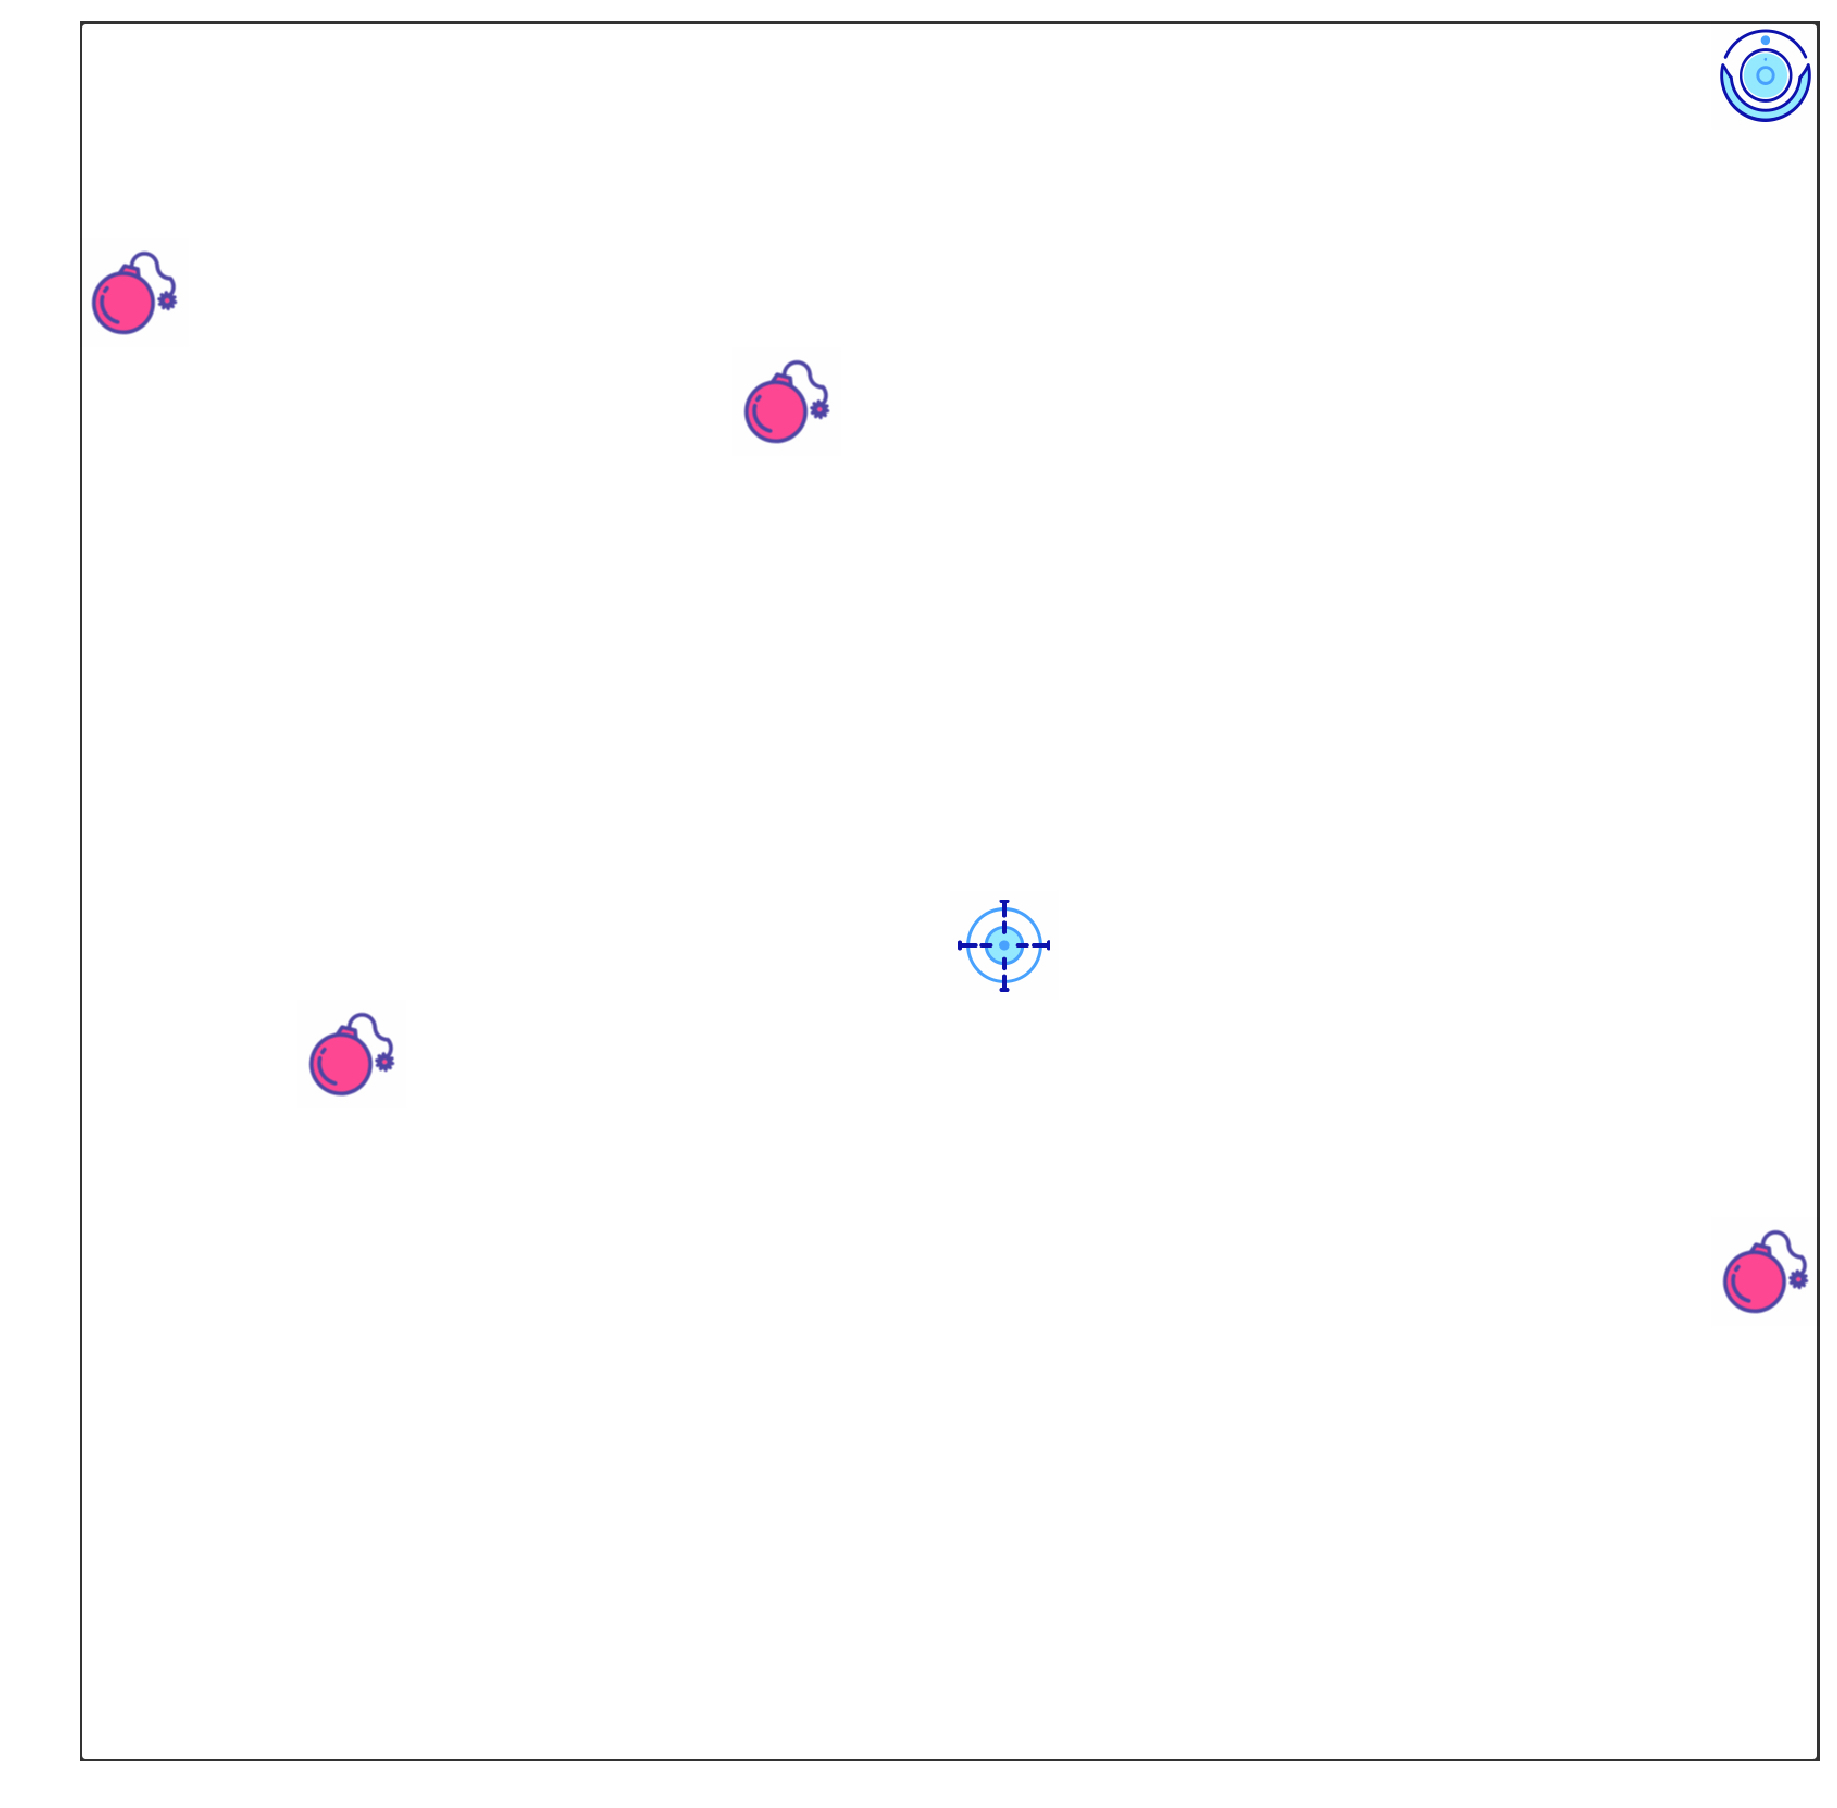

Maze of size (16, 16)


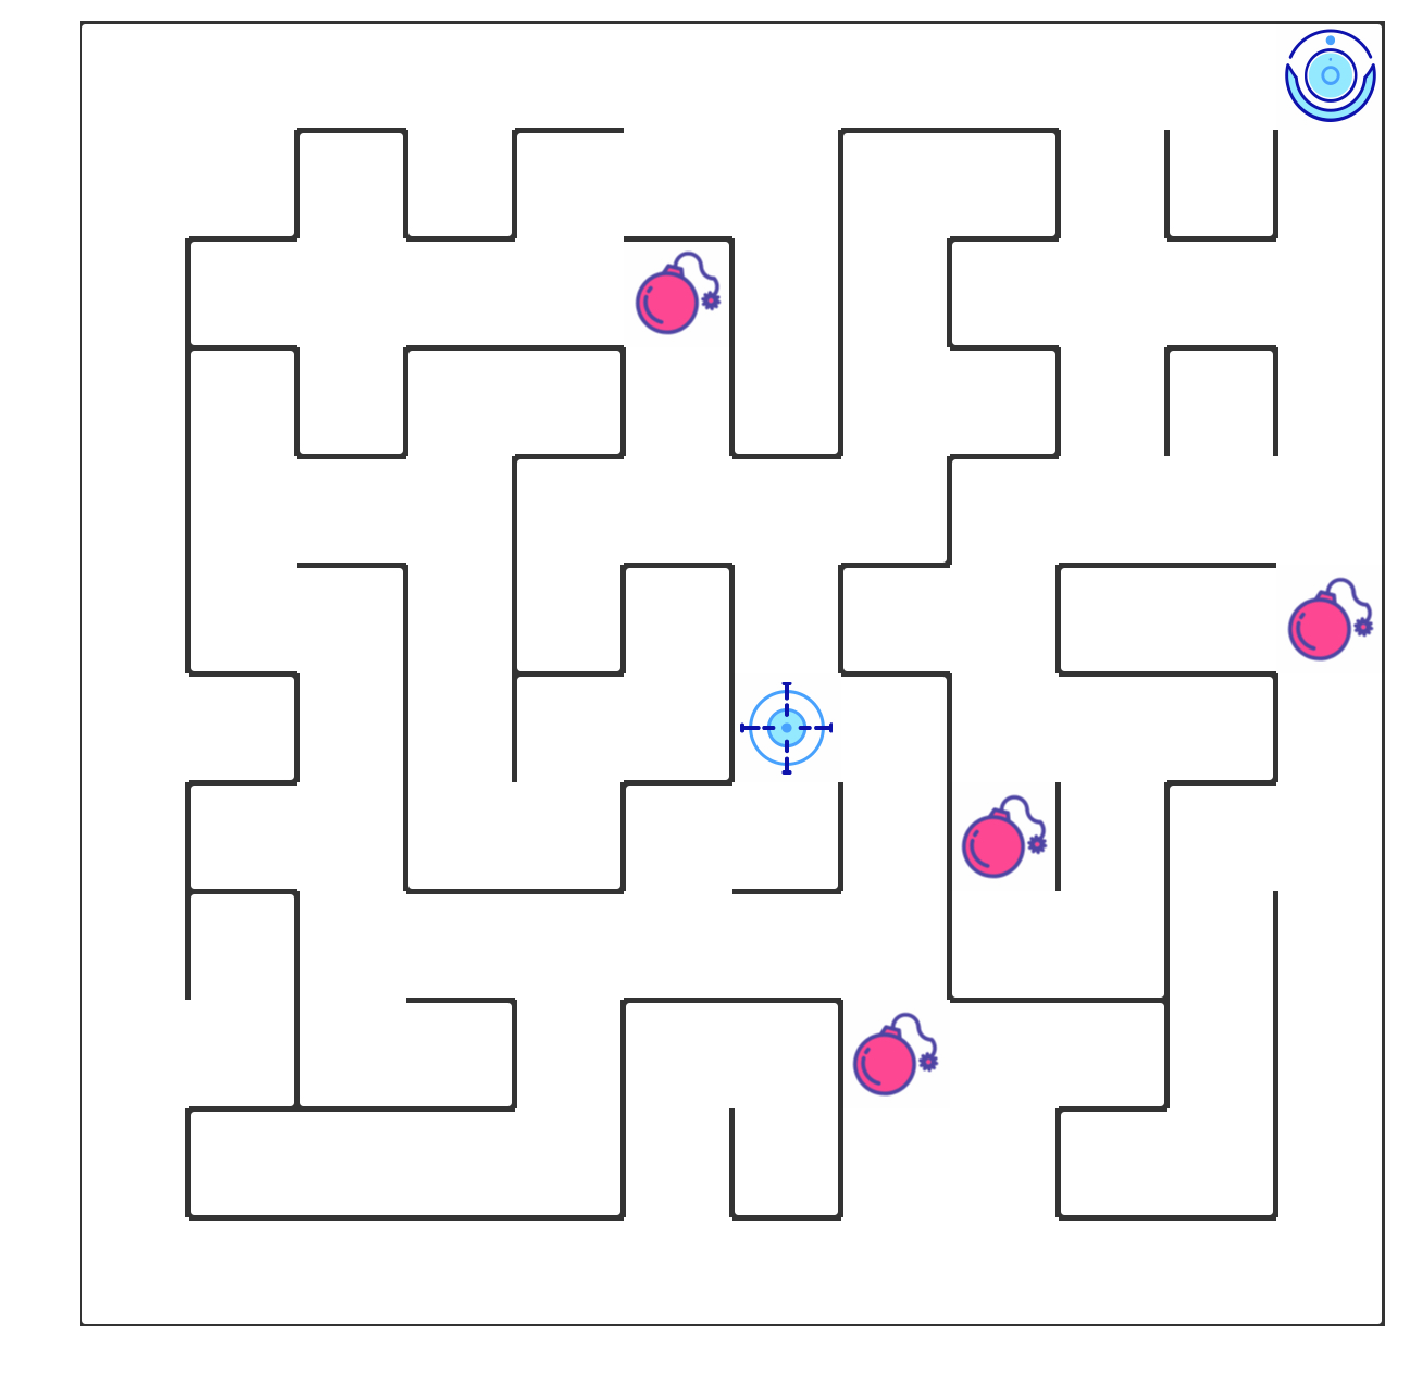

Maze of size (12, 12)


In [12]:
from Maze import Maze
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## todo: 创建迷宫并展示
# 根据指定的文件，读入一个迷宫地图信息
maze01 = Maze(from_file='test_world/maze_01.txt', trap_number=6)
maze02 = Maze(from_file='test_world/maze_02.txt', trap_number=7)
maze03 = Maze(from_file='test_world/maze_03.txt', trap_number=3)
maze04 = Maze(from_file='test_world/maze_04.txt', trap_number=4)
print(maze01)
print(maze02)
print(maze03)
print(maze04)

# # 随机生成迷宫
my_maze = Maze(maze_size=(12, 12), trap_number=4)
print(my_maze)

---

你可能已经注意到，在迷宫中我们已经默认放置了一个机器人。实际上，我们为迷宫配置了相应的 API，来帮助机器人的移动与感知。其中你随后会使用的两个 API 为 `maze.sense_robot()` 及 `maze.move_robot()`。

1. `maze.sense_robot()` 为一个无参数的函数，输出机器人在迷宫中目前的位置。
2. `maze.move_robot(direction)` 对输入的移动方向，移动机器人，并返回对应动作的奖励值。

---

**问题 5**：随机移动机器人，并记录下获得的奖励，展示出机器人最后的位置。

['u', 'u', 'd', 'r', 'l', 'd', 'l', 'u', 'u', 'l']
[-10.0, -10.0, -0.1, -10.0, -10.0, -0.1, -0.1, -10.0, -10.0, -0.1]
[(0, 11), (0, 11), (1, 11), (1, 11), (1, 11), (2, 11), (2, 10), (2, 10), (2, 10), (2, 9)]
(2, 9)


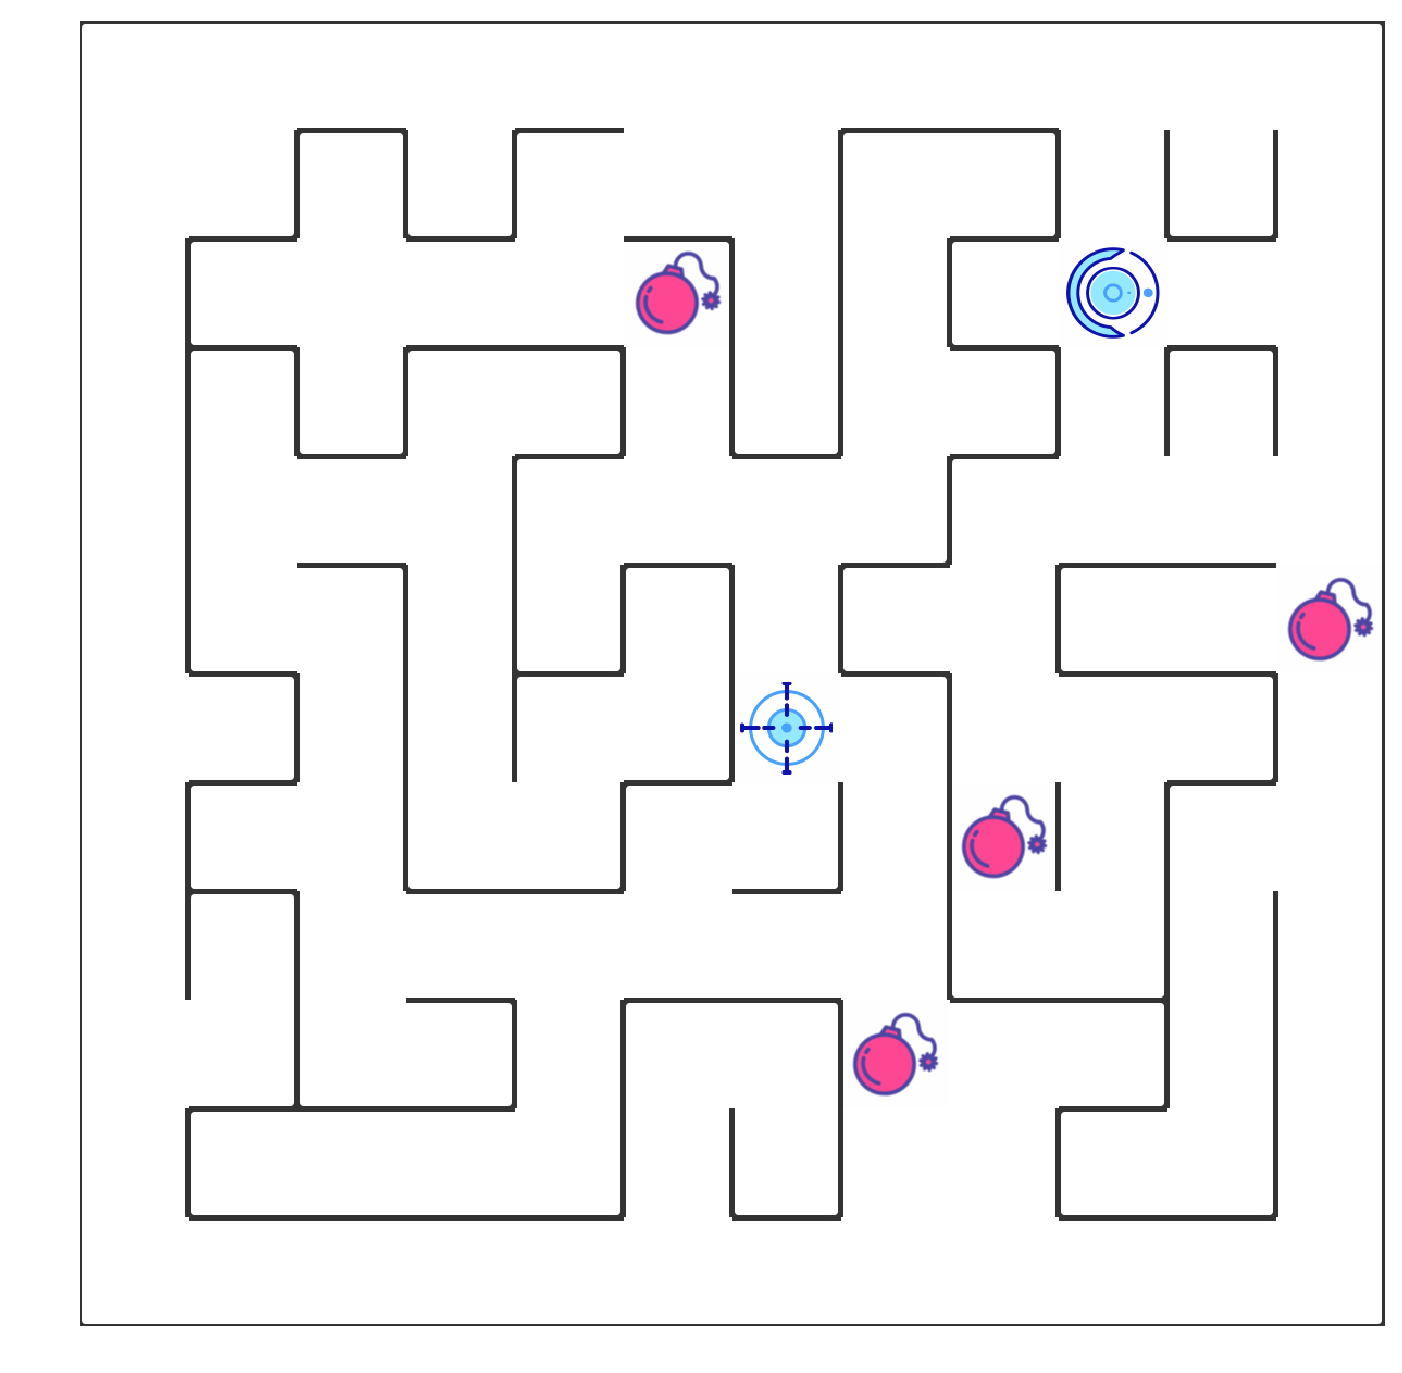

Maze of size (12, 12)


In [15]:
rewards = []
random_actions = []
poses = []

my_maze.reset_robot()

## 循环、随机移动机器人10次，记录下奖励
for i in range(10):
    action = random.choice(actions)
    rewards.append(my_maze.move_robot(action))
    
    random_actions.append(action)
    poses.append(my_maze.sense_robot())

print(random_actions)
print(rewards)    
print(poses)
    
## 输出机器人最后的位置
print(my_maze.sense_robot())

## 打印迷宫，观察机器人位置
print(my_maze)

## 2.2. `Robot` 类实现

`Robot` 类是我们需要重点实现的部分。在这个类中，我们需要实现诸多功能，以使得我们成功实现一个强化学习智能体。总体来说，之前我们是人为地在环境中移动了机器人，但是现在通过实现 `Robot` 这个类，机器人将会自己移动。通过实现学习函数，`Robot` 类将会学习到如何选择最优的动作，并且更新强化学习中对应的参数。

首先 `Robot` 有多个输入，其中 `alpha=0.5, gamma=0.9, epsilon0=0.5` 表征强化学习相关的各个参数的默认值，这些在之前你已经了解到，`Maze` 应为机器人所在迷宫对象。

随后观察 `Robot.update` 函数，它指明了在每次执行动作时，`Robot` 需要执行的程序。按照这些程序，各个函数的功能也就明了了。

最后你需要实现 `Robot.py` 代码中的8段代码，他们都在代码中以 `#TODO` 进行标注，你能轻松地找到他们。

---

**问题 6**：实现 `Robot.py` 中的8段代码，并运行如下代码检查效果（记得将 `maze` 变量修改为你创建迷宫的变量名）。



('r', -0.1)


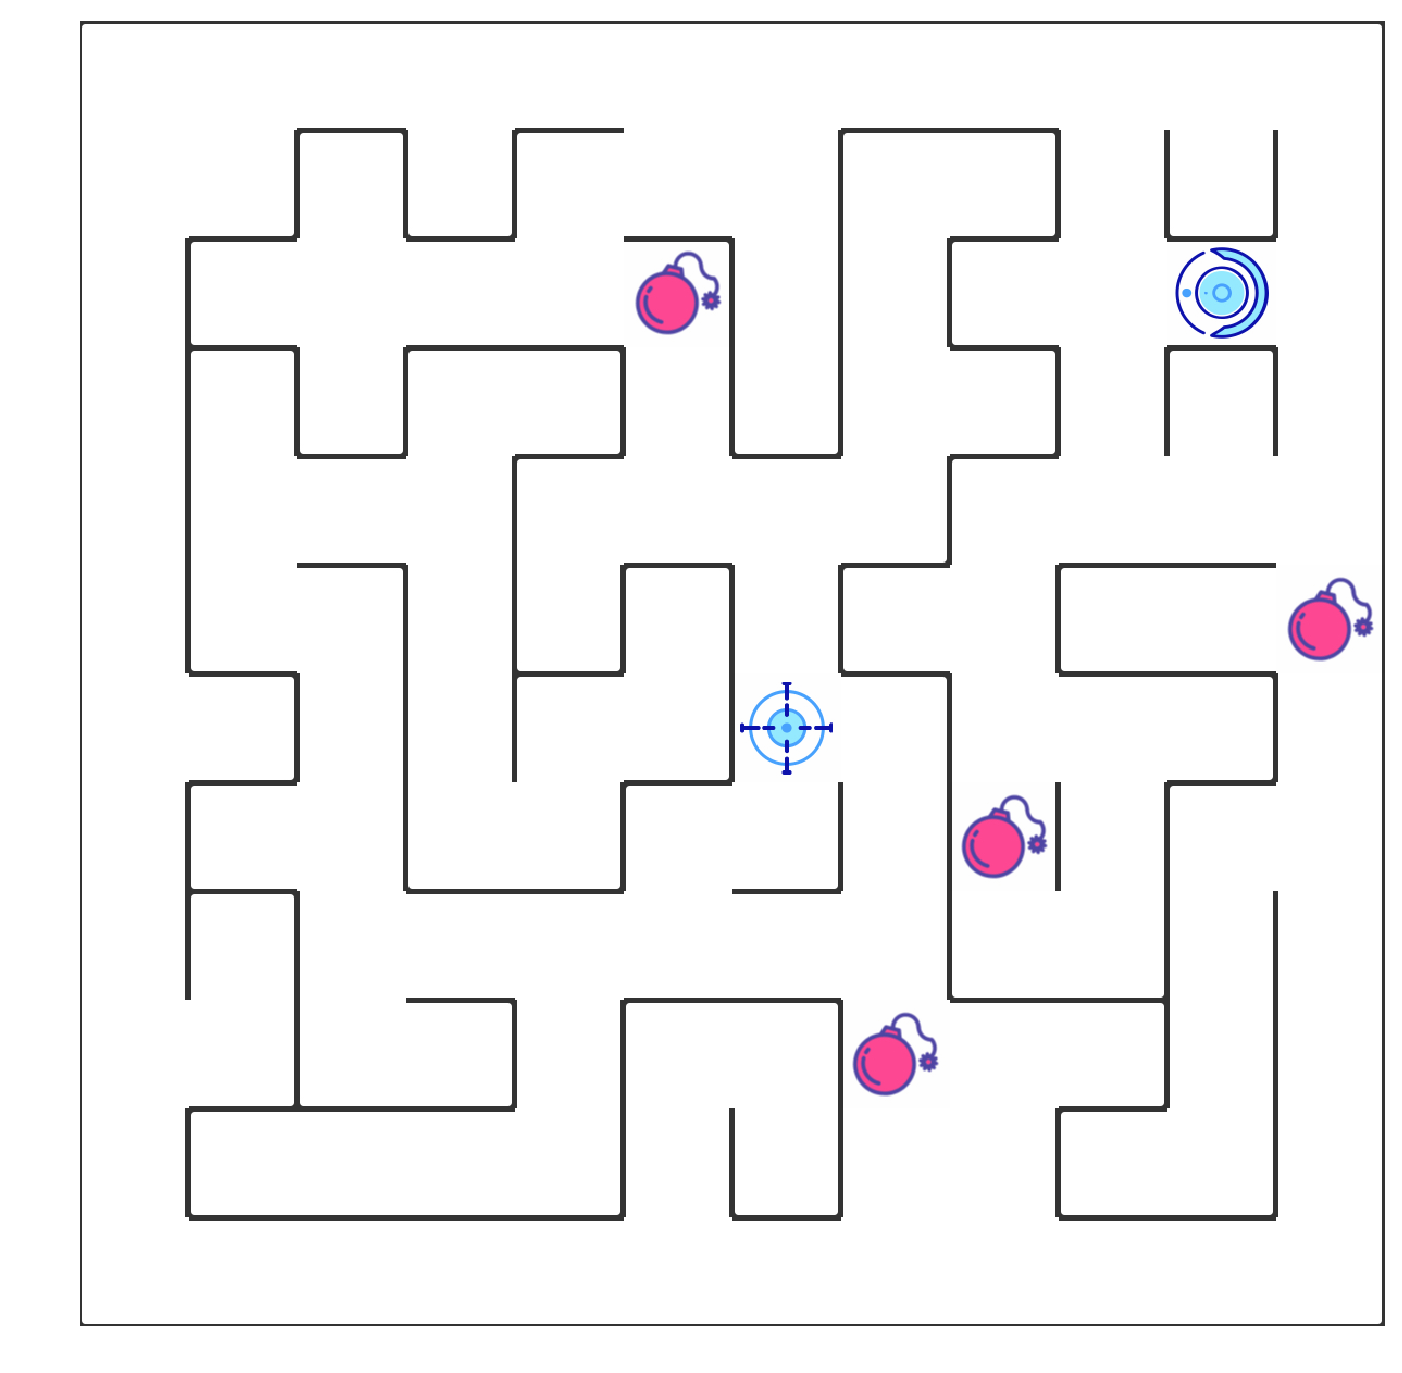

Maze of size (12, 12)

In [16]:
from Robot import Robot
robot = Robot(my_maze) # 记得将 maze 变量修改为你创建迷宫的变量名
robot.set_status(learning=True,testing=False)
print(robot.update())

my_maze

---

## 2.3 用 `Runner` 类训练 Robot

在实现了上述内容之后，我们就可以开始对我们 `Robot` 进行训练并调参了。我们为你准备了又一个非常棒的类 `Runner`，来实现整个训练过程及可视化。使用如下的代码，你可以成功对机器人进行训练。并且你会在当前文件夹中生成一个名为 `filename` 的视频，记录了整个训练的过程。通过观察该视频，你能够发现训练过程中的问题，并且优化你的代码及参数。

---

**问题 7**：尝试利用下列代码训练机器人，并进行调参。可选的参数包括：

- 训练参数
    - 训练次数 `epoch`
- 机器人参数：
    - `epsilon0` (epsilon 初值)
    - `epsilon`衰减（可以是线性、指数衰减，可以调整衰减的速度），你需要在 Robot.py 中调整
    - `alpha`
    - `gamma`
- 迷宫参数:
    - 迷宫大小
    - 迷宫中陷阱的数量

In [17]:
## 可选的参数：
epoch = 20

epsilon0 = 0.5
alpha = 0.5
gamma = 0.9

maze_size = (6,6)
trap_number = 1

In [18]:
from Runner import Runner

g = Maze(maze_size=maze_size,trap_number=trap_number)
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner = Runner(r, g)
runner.run_training(epoch, display_direction=True)
runner.generate_movie(filename = "final1.mp4") # 你可以注释该行代码，加快运行速度，不过你就无法观察到视频了。

Generate Movies: 100%|███████████████████████| 601/601 [00:14<00:00, 40.93it/s]


---

使用 `runner.plot_results()` 函数，能够打印机器人在训练过程中的一些参数信息。

- Success Times 代表机器人在训练过程中成功的累计次数，这应当是一个累积递增的图像。
- Accumulated Rewards 代表机器人在每次训练 epoch 中，获得的累积奖励的值，这应当是一个逐步递增的图像。
- Running Times per Epoch 代表在每次训练 epoch 中，小车训练的次数（到达终点就会停止该 epoch 转入下次训练），这应当是一个逐步递减的图像。

---

**问题 8**：使用 `runner.plot_results()` 输出训练结果，根据该结果对你的机器人进行分析。

- 指出你选用的参数如何，选用参数的原因。
- 建议你比较不同参数下机器人的训练的情况。
- 训练的结果是否满意，有何改进的计划。

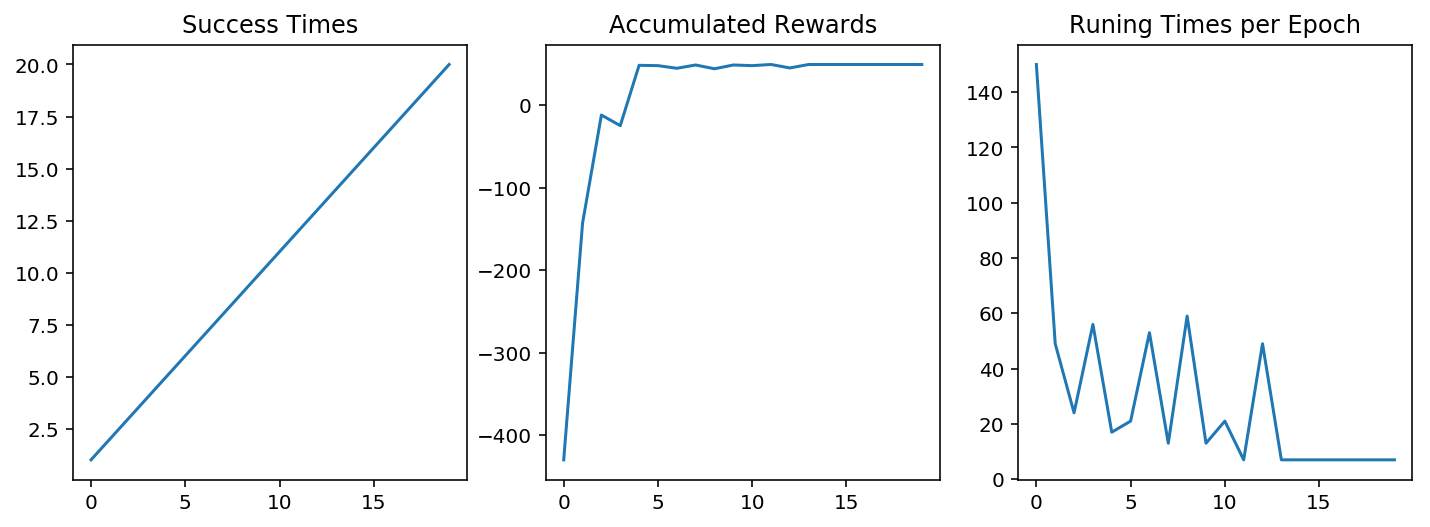

In [19]:
runner.plot_results()

In [69]:
# 定义训练辅助函数
def run_train(maze=None, epoch=20, epsilon0=0.5, alpha=0.5, gamma=0.9, maze_size=(6,6), trap_number=1, training_per_epoch=150, epsilon_atten=0.99, epsilon_type='exp'):
    if maze:
        g = maze
    else:
        g = Maze(maze_size=maze_size,trap_number=trap_number)
        
    r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma, epsilon_atten=epsilon_atten, epsilon_type=epsilon_type)
    r.set_status(learning=True)

    runner = Runner(r, g)
    runner.run_training(epoch, training_per_epoch=training_per_epoch, display_direction=True)
    
    runner.plot_results()

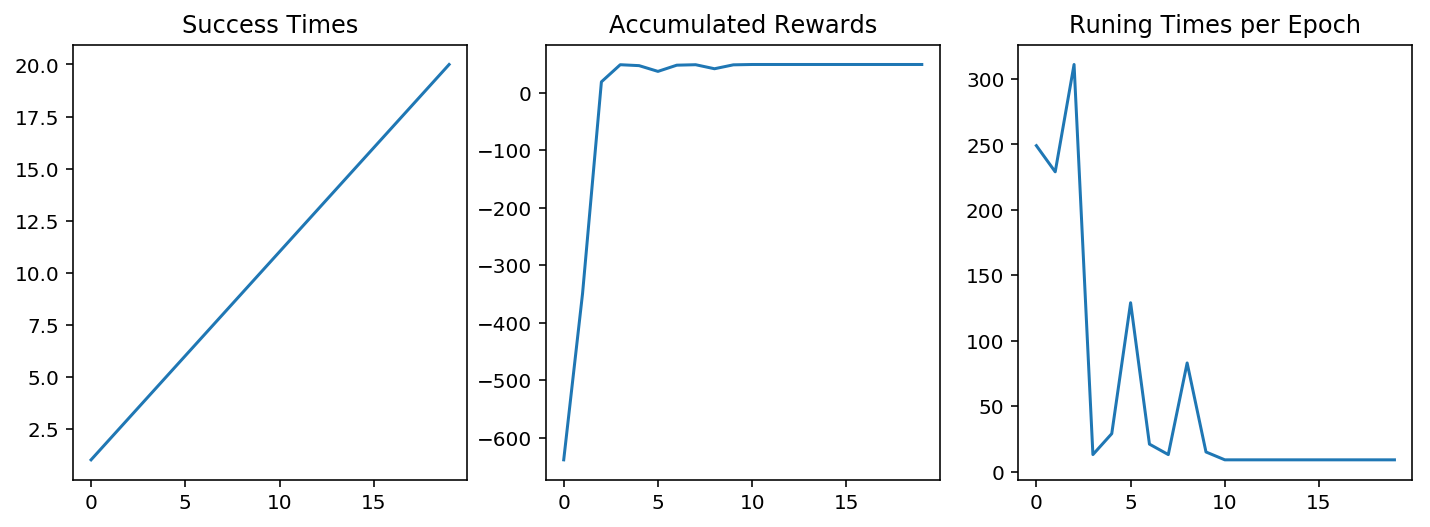

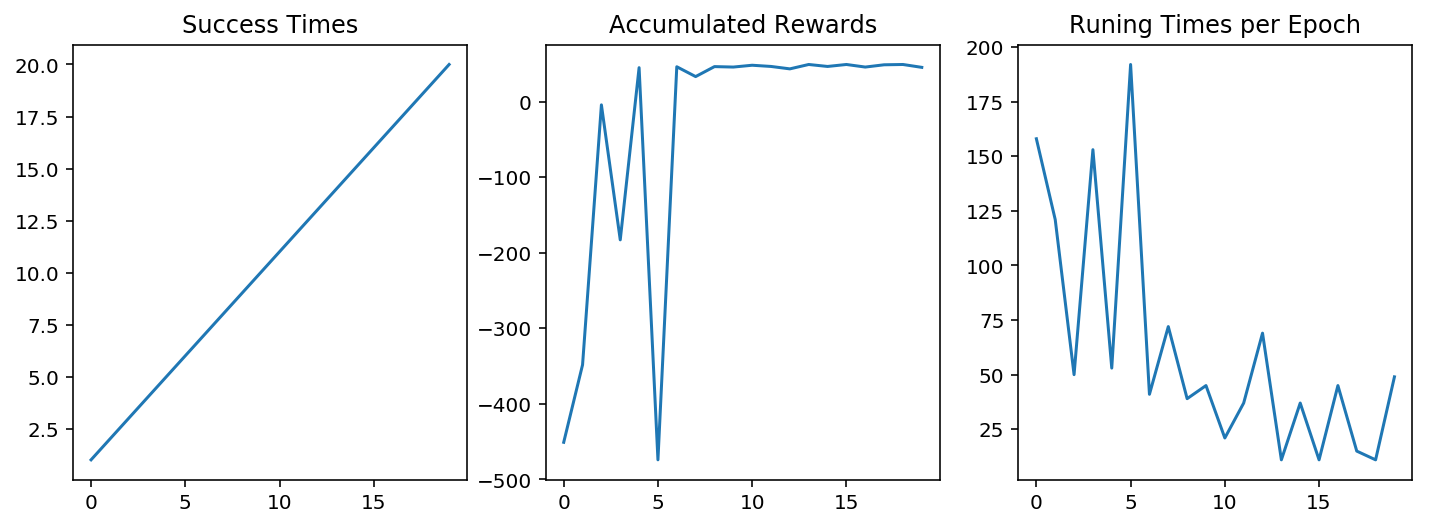

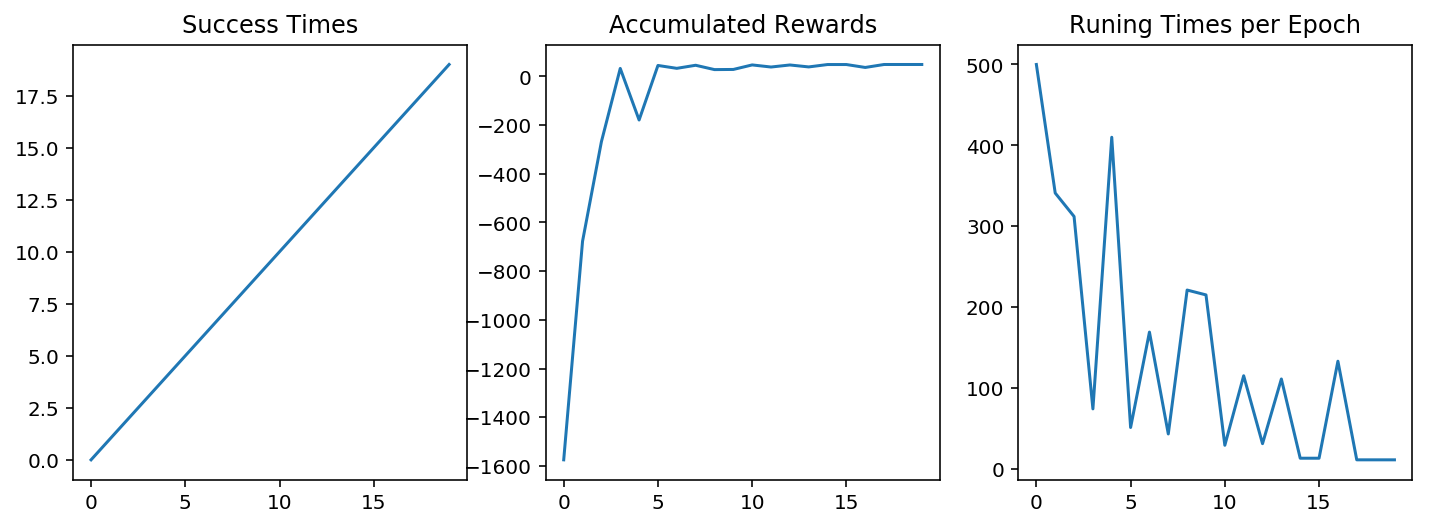

In [33]:
# 调整maze_size迷宫大小，为了支持更大的迷宫，这里将training_per_epoch提升到500
run_train(maze_size=(8, 8), training_per_epoch=500)
run_train(maze_size=(10, 10), training_per_epoch=500)
run_train(maze_size=(12, 12), training_per_epoch=500)

为了支持更大的迷宫，我把training_per_epoch也作为超参数，上限提升到500。调整迷宫大小可以看出，当迷宫越来越大时，每阶段的训练次数越来越多，但是总体趋势是一致的，成功次数线性增长，累积奖励向上收敛，每阶段的训练次数越来越小，证明机器人通过学习能更快速的找到终点。

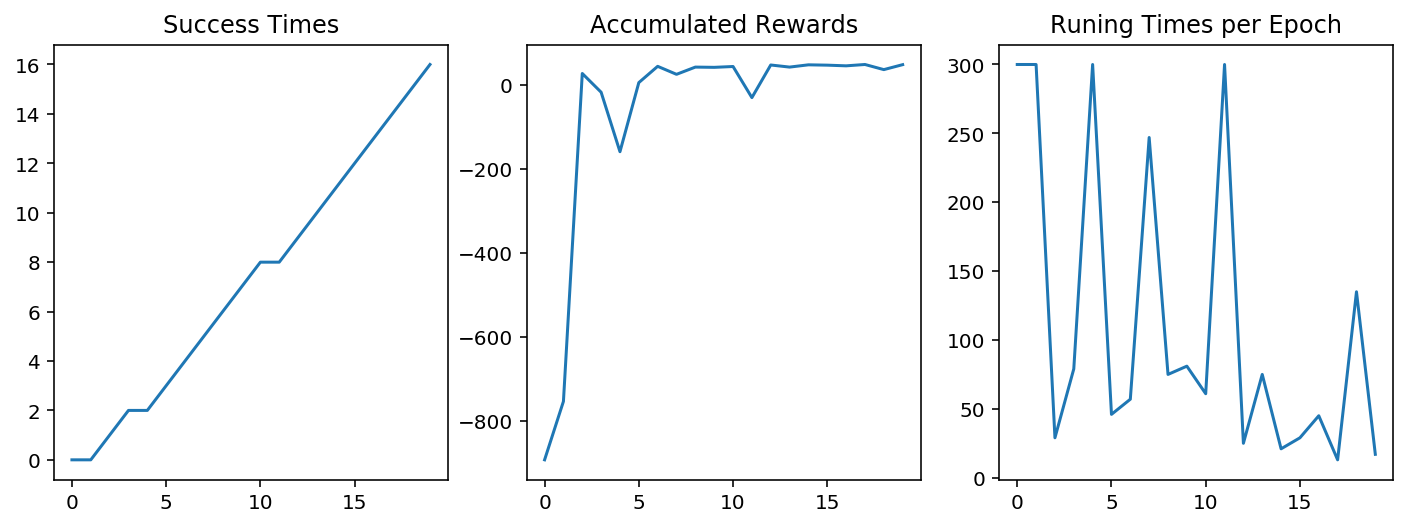

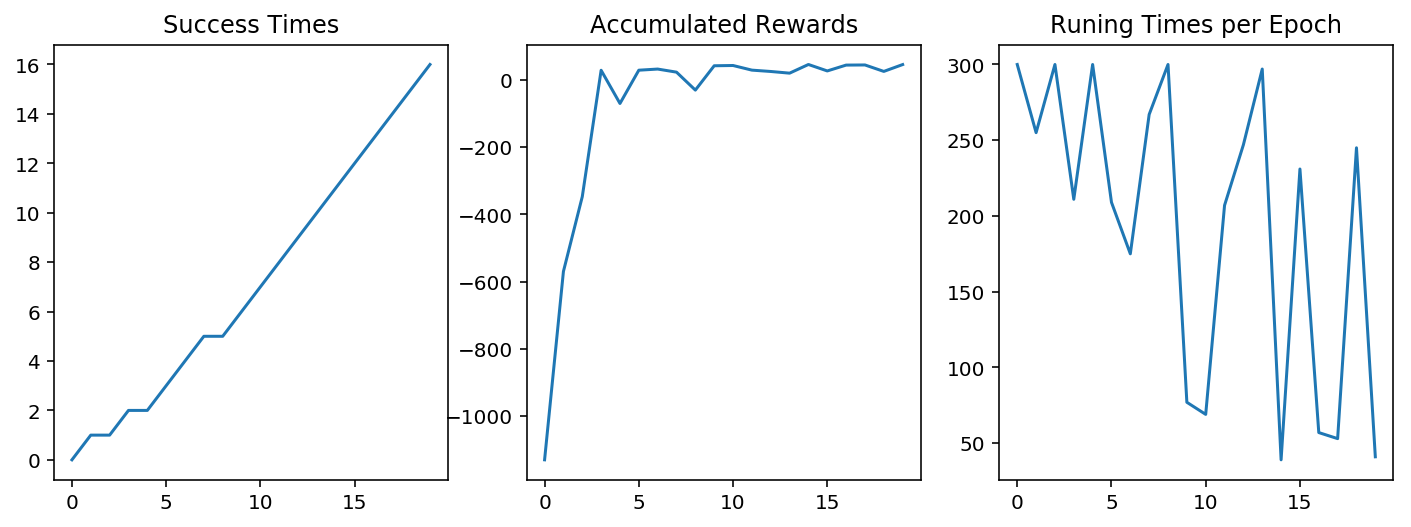

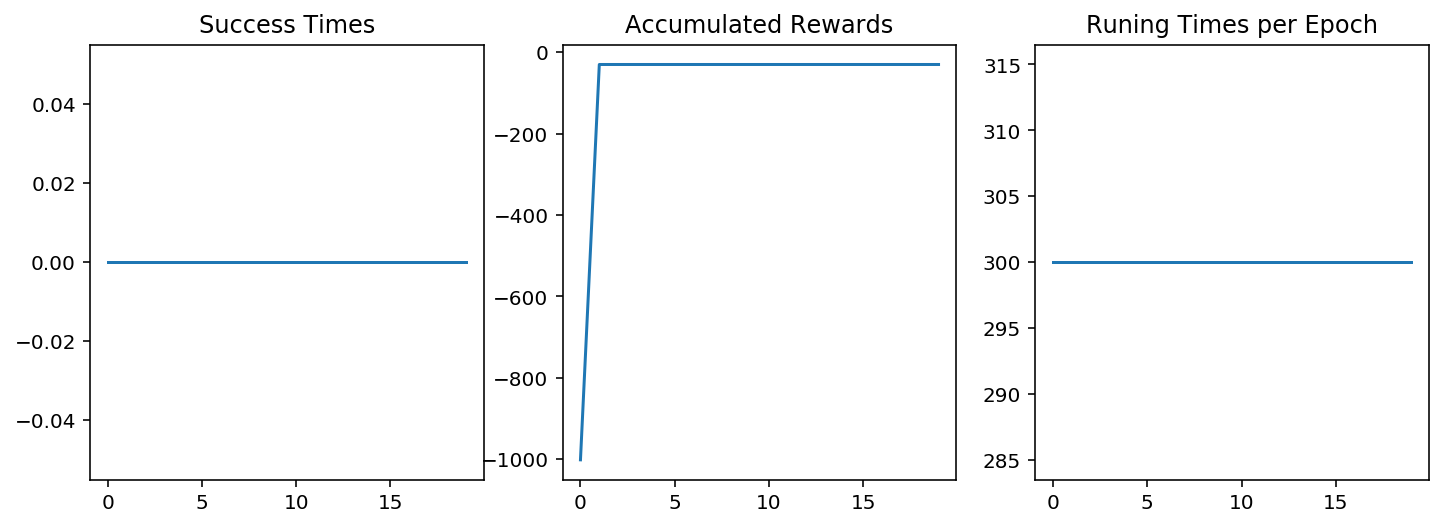

In [51]:
# 调整maze_size陷阱数量
run_train(maze_size=(10, 10), training_per_epoch=300, trap_number=2)
run_train(maze_size=(10, 10), training_per_epoch=300, trap_number=4)
run_train(maze_size=(10, 10), training_per_epoch=300, trap_number=6)

测试相同迷宫大小下，不同陷阱个数带来的影响，可以看出当陷阱个数增多时，每阶段的训练次数会增加，成功率会降低，甚至可能出现无法成功的情况。

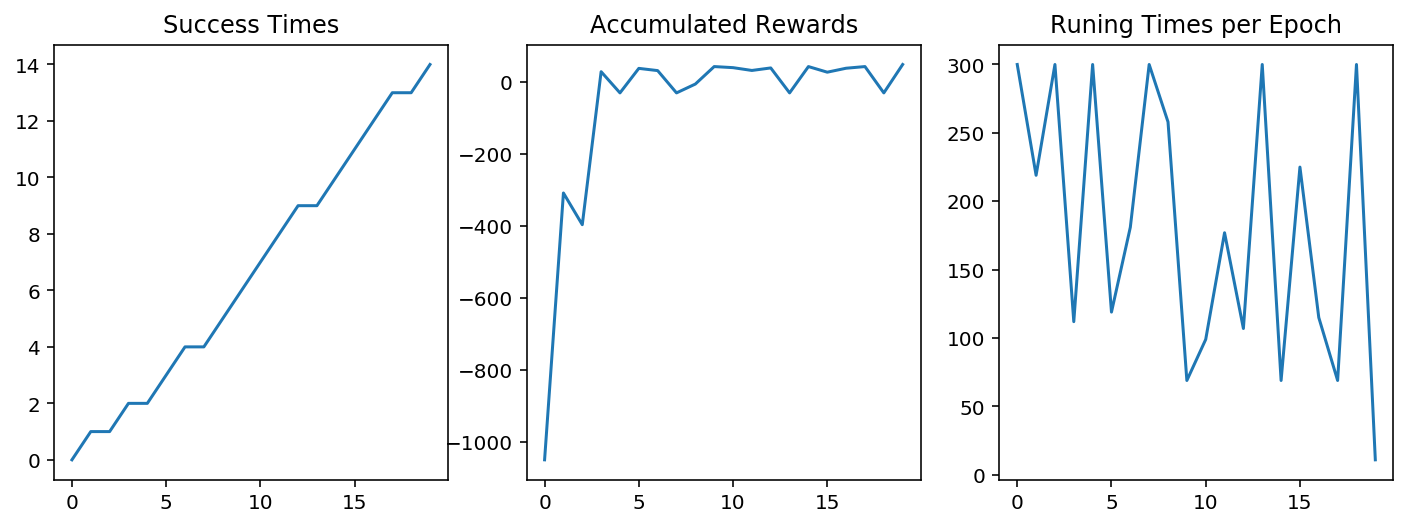

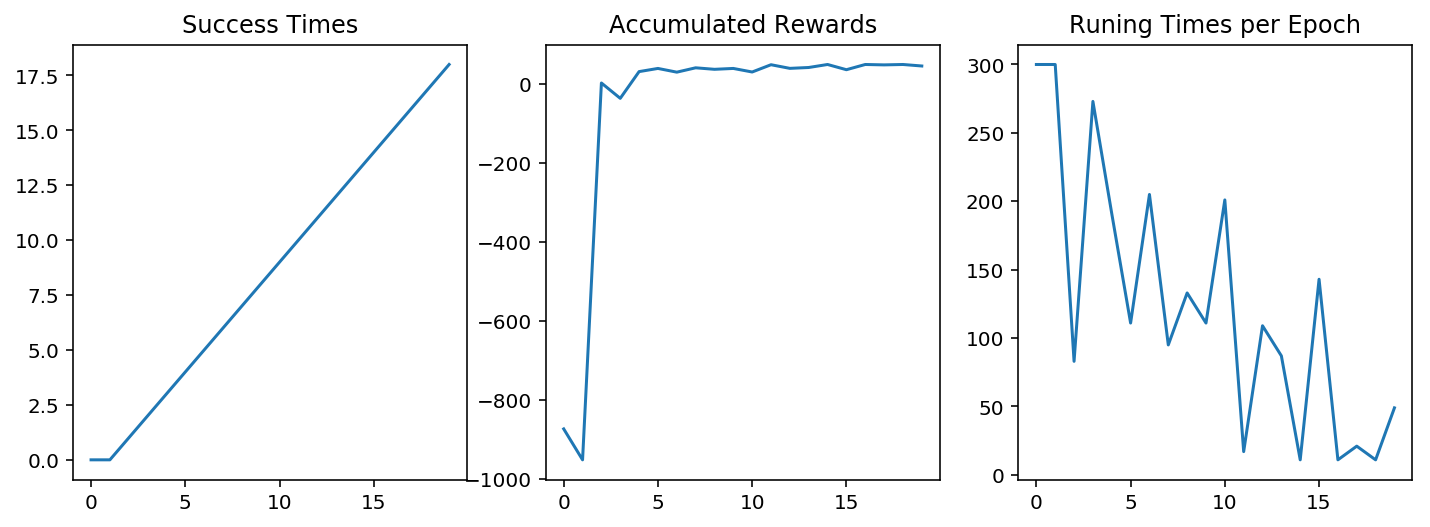

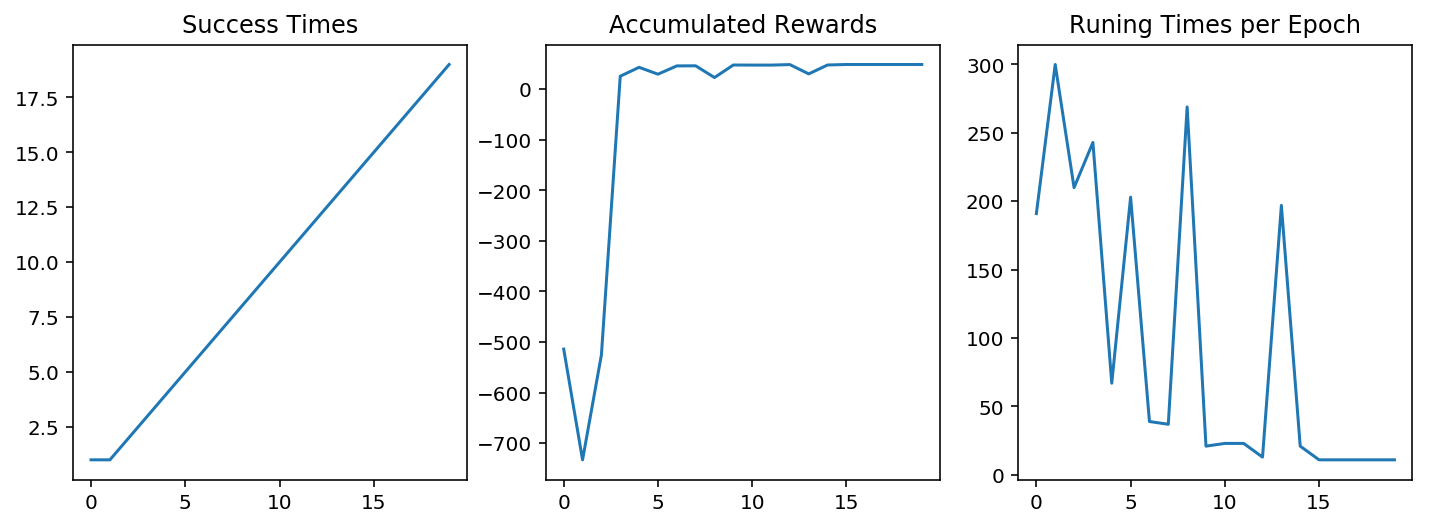

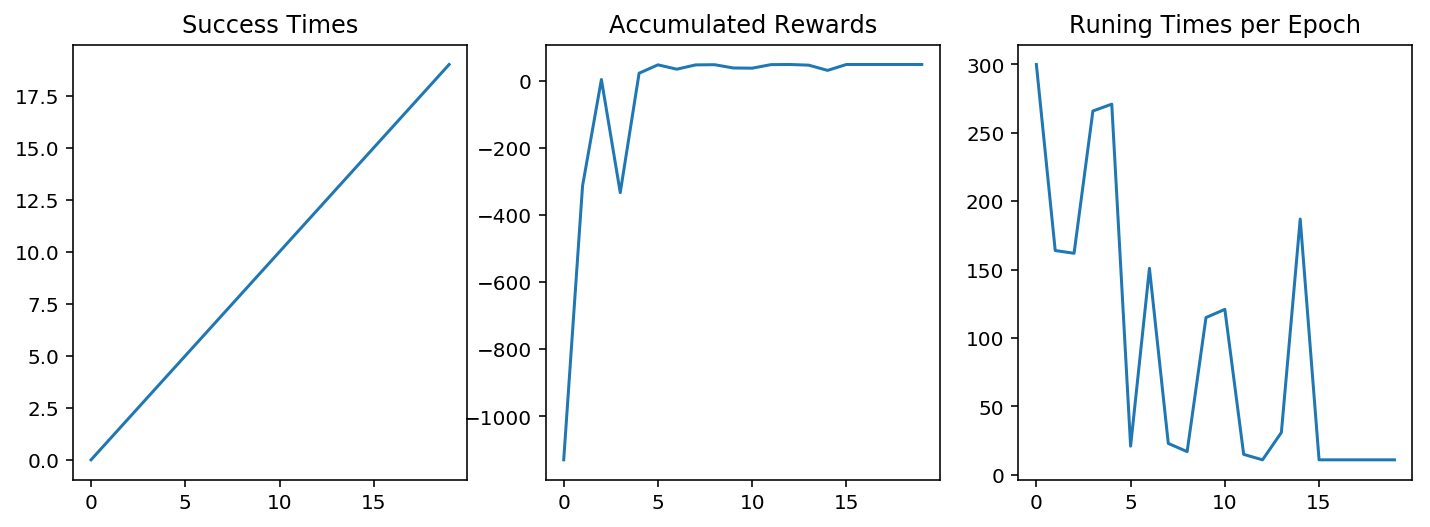

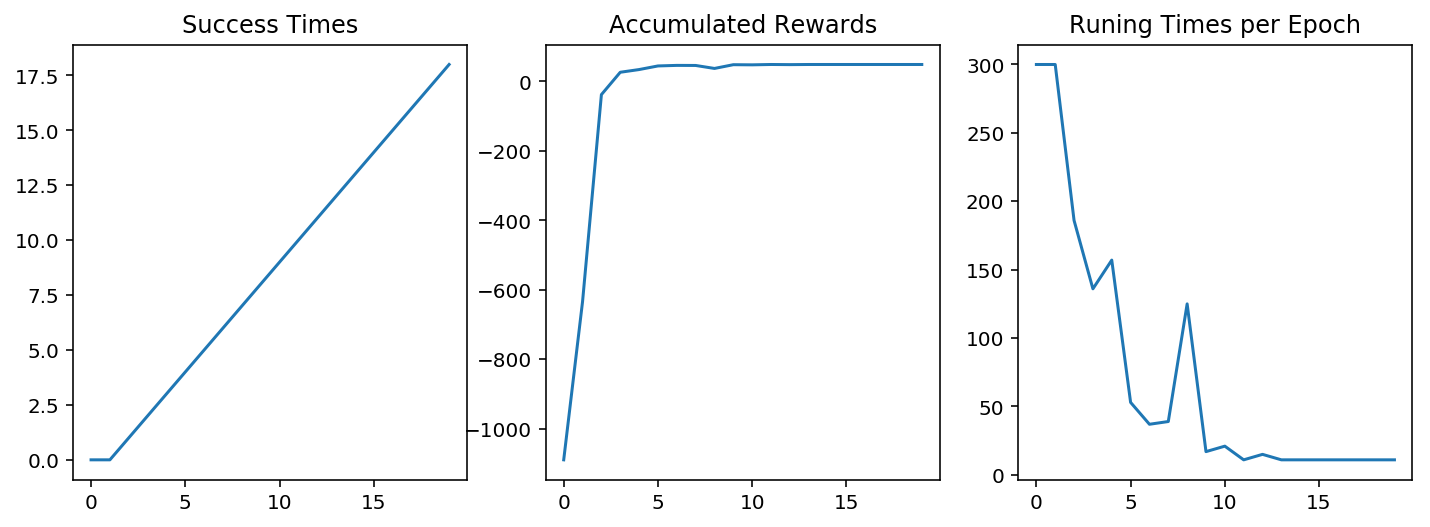

In [44]:
# 调整松弛变量alpha
# 保证是同一个地图
maze = Maze(maze_size=(10, 10), trap_number=3)
run_train(alpha=0.1, maze=maze, training_per_epoch=300)
run_train(alpha=0.3, maze=maze, training_per_epoch=300)
run_train(alpha=0.5, maze=maze, training_per_epoch=300)
run_train(alpha=0.7, maze=maze, training_per_epoch=300)
run_train(alpha=0.9, maze=maze, training_per_epoch=300)

测试同一个地图下松弛变量为0.1, 0.3, 0.5, 0.7, 0.9时，对训练效果的影响。  
从公式可以看出，松弛变量越小，保留原Q值的程度越大，松弛变量越大，学习新奖励的比例越大。  
从以上曲线变化可以看出，随着alpha越来越大，累积奖励和每阶段运行次数更快趋近于收敛。

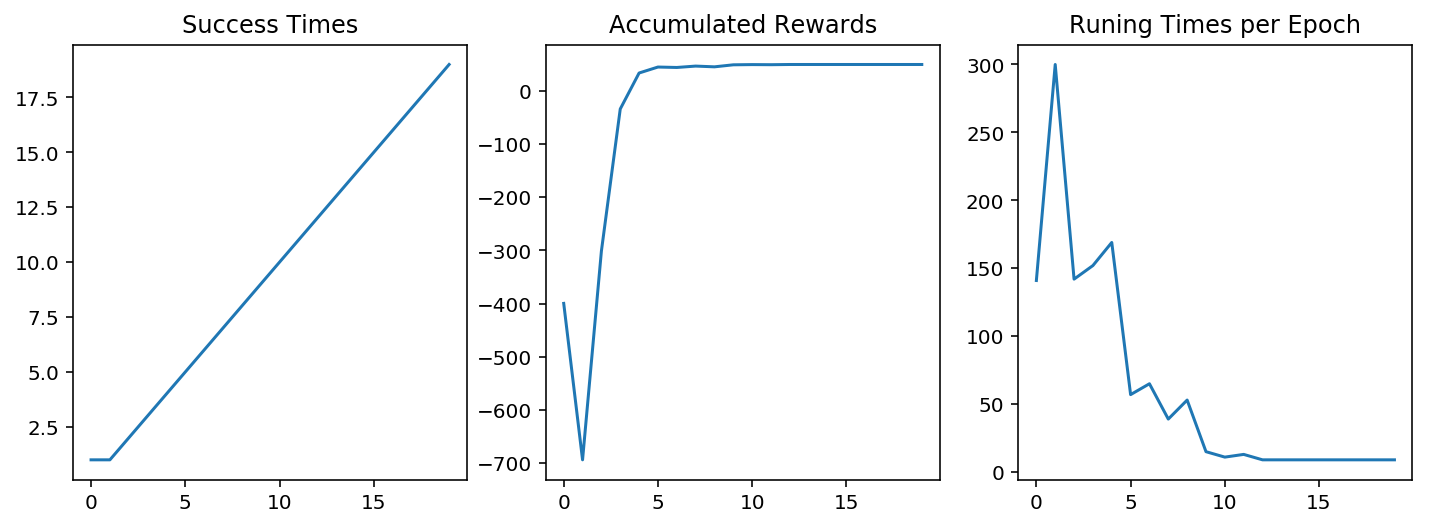

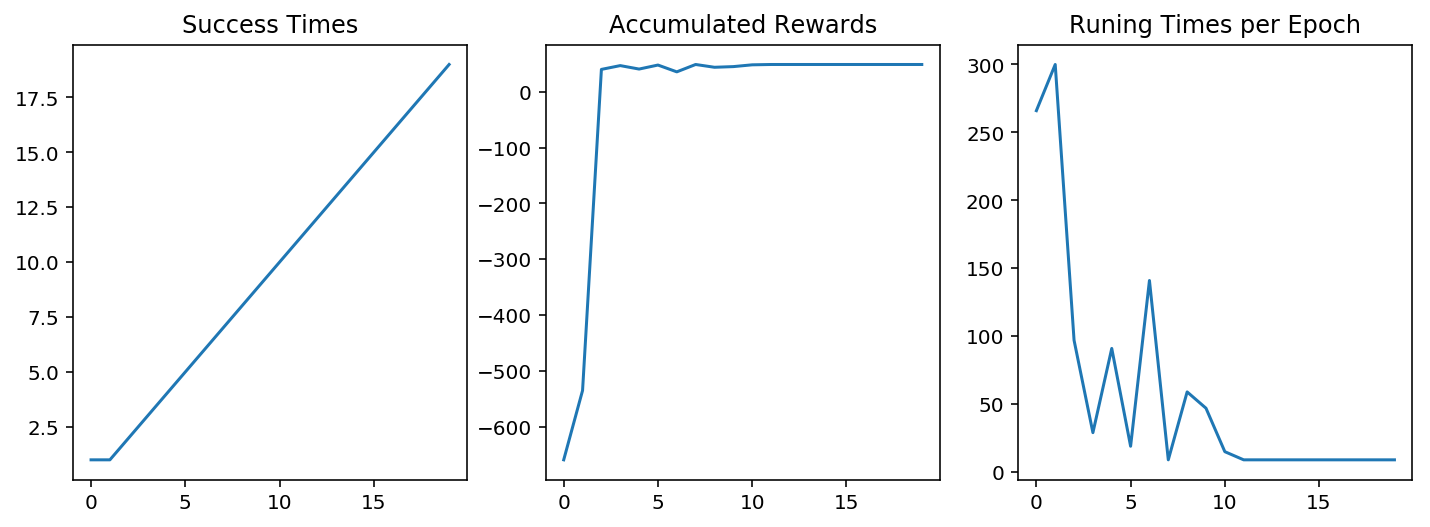

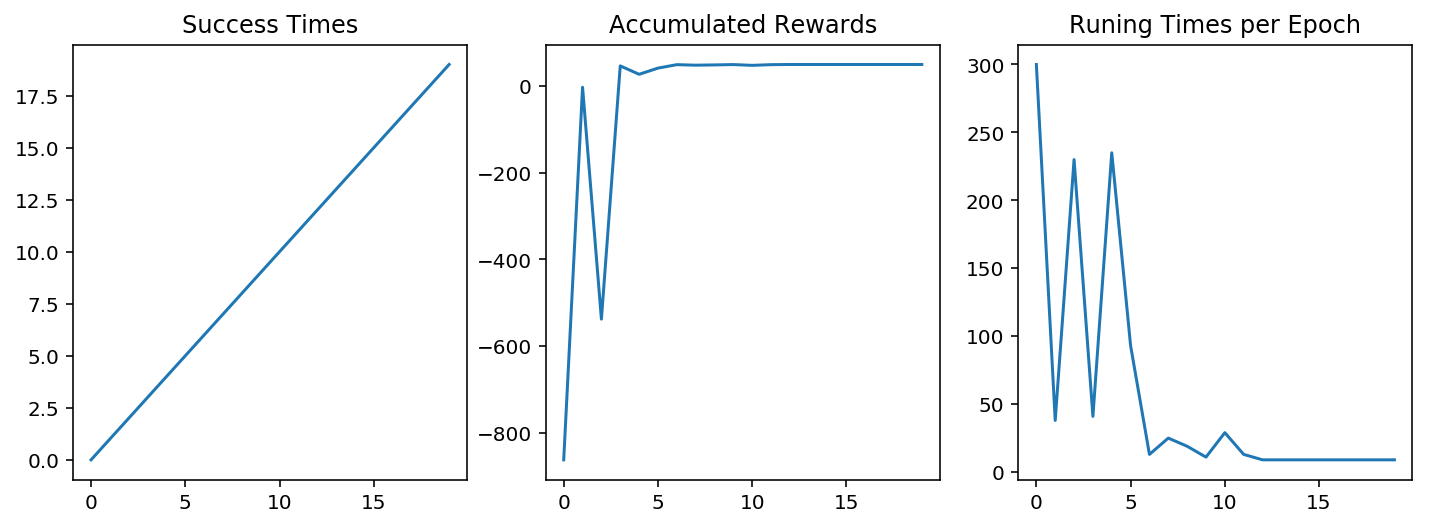

In [63]:
maze = Maze(maze_size=(10, 10), trap_number=3)
run_train(gamma=0.5, maze=maze, training_per_epoch=300)
run_train(gamma=0.7, maze=maze, training_per_epoch=300)
run_train(gamma=0.9, maze=maze, training_per_epoch=300)

当调整折扣因子gamma为0.5, 0.7, 0.9，从公式可以看出，gamma表示未来奖励对行为的影响程度，gamma越大，则行为越受未来奖励的引导。从曲线可以看出，当gamma越大时，每阶段的运行次数越快趋近于最小值，二者相符。

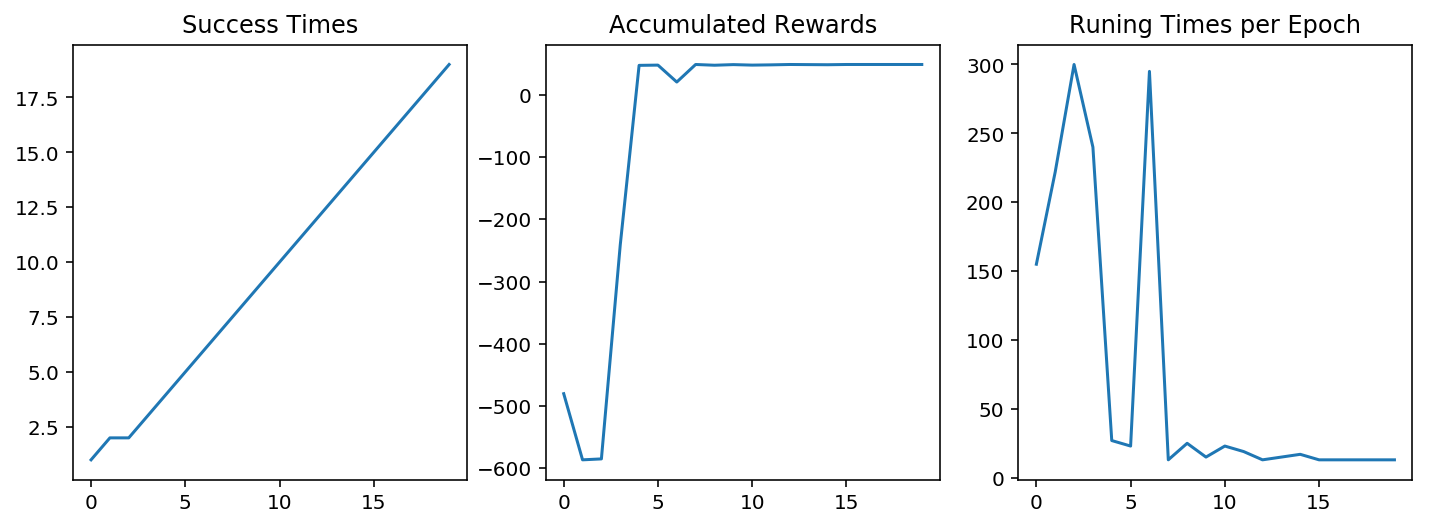

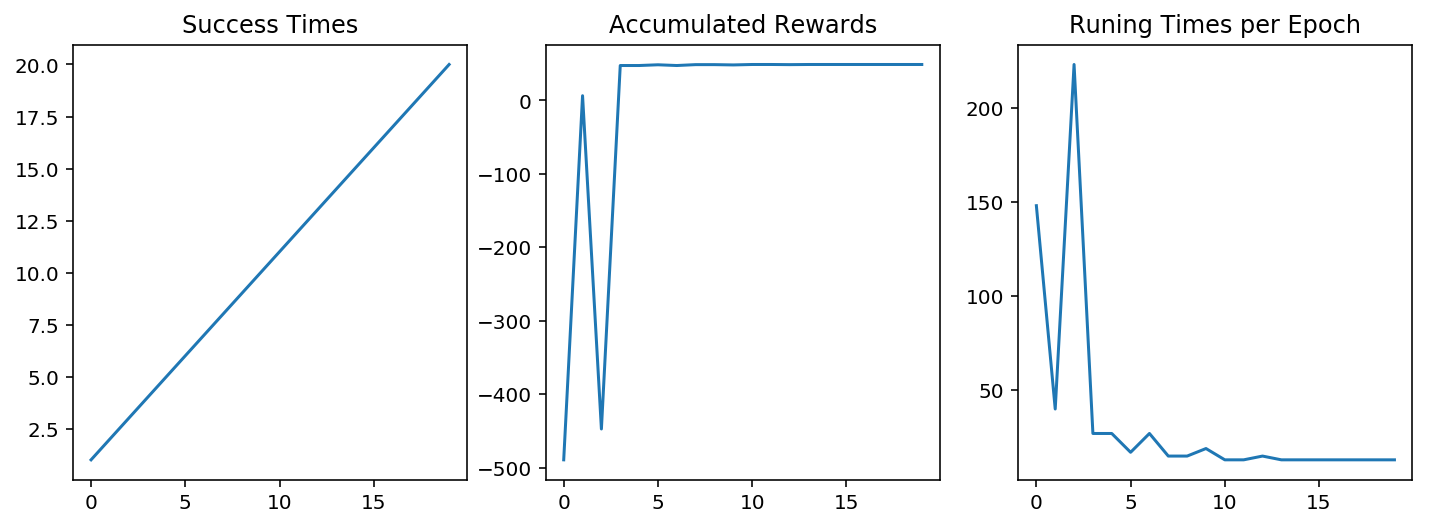

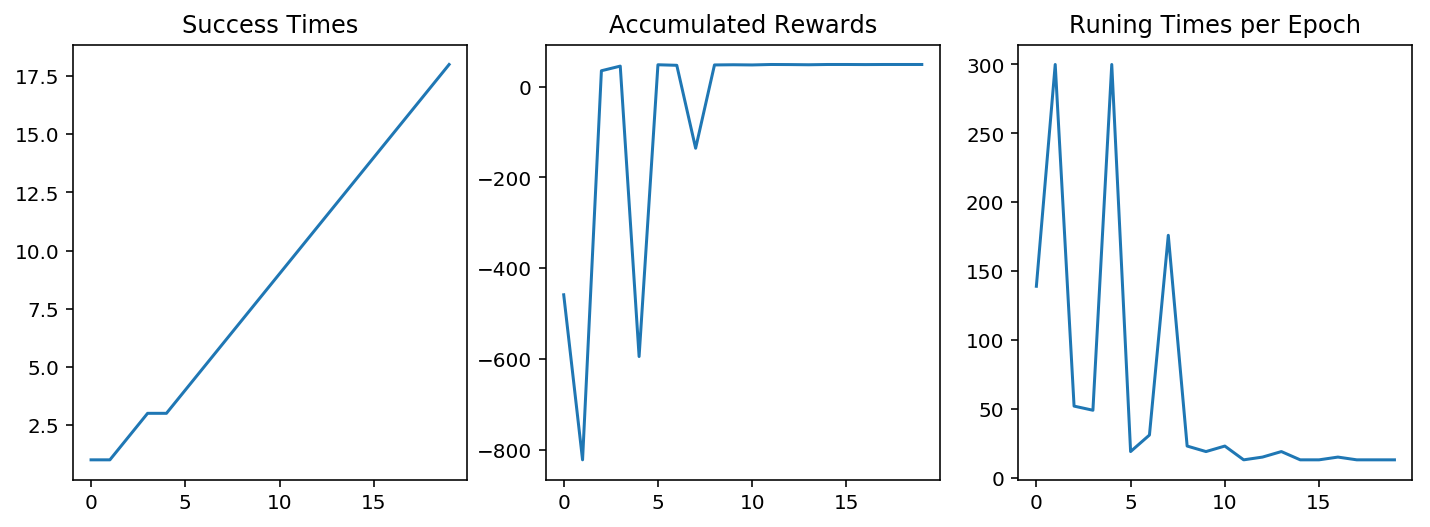

In [60]:
maze = Maze(maze_size=(10, 10), trap_number=3)
run_train(epsilon0=0.25, maze=maze, training_per_epoch=300)
run_train(epsilon0=0.5, maze=maze, training_per_epoch=300)
run_train(epsilon0=0.75, maze=maze, training_per_epoch=300)

epsilon0为epsilon-greedy算法的初始epsilon值，epsilon0越大，则随机探索的概率越大。这里测试了0.25, 0.5, 0.75，从曲线可以看出当epsilon=0.5时，收敛速度最快。

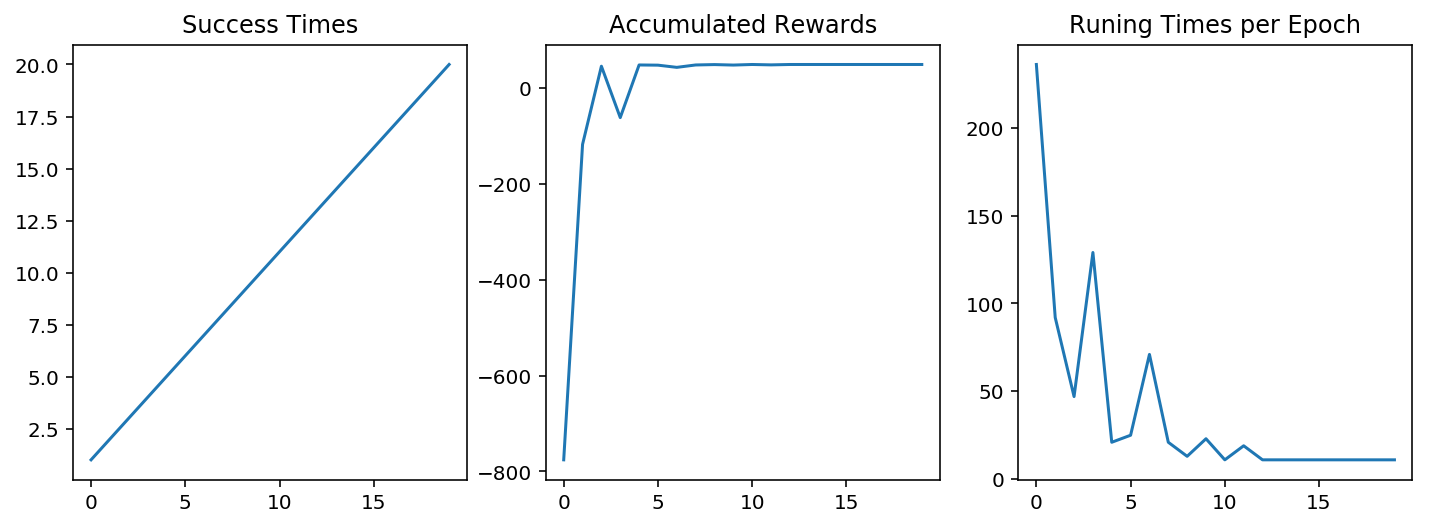

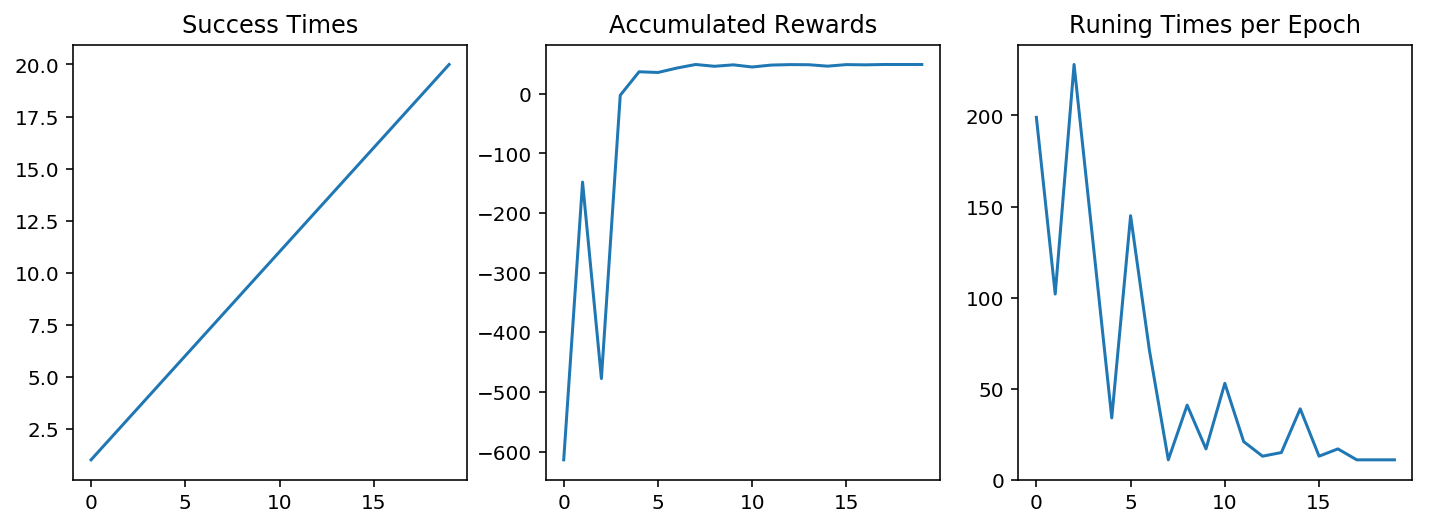

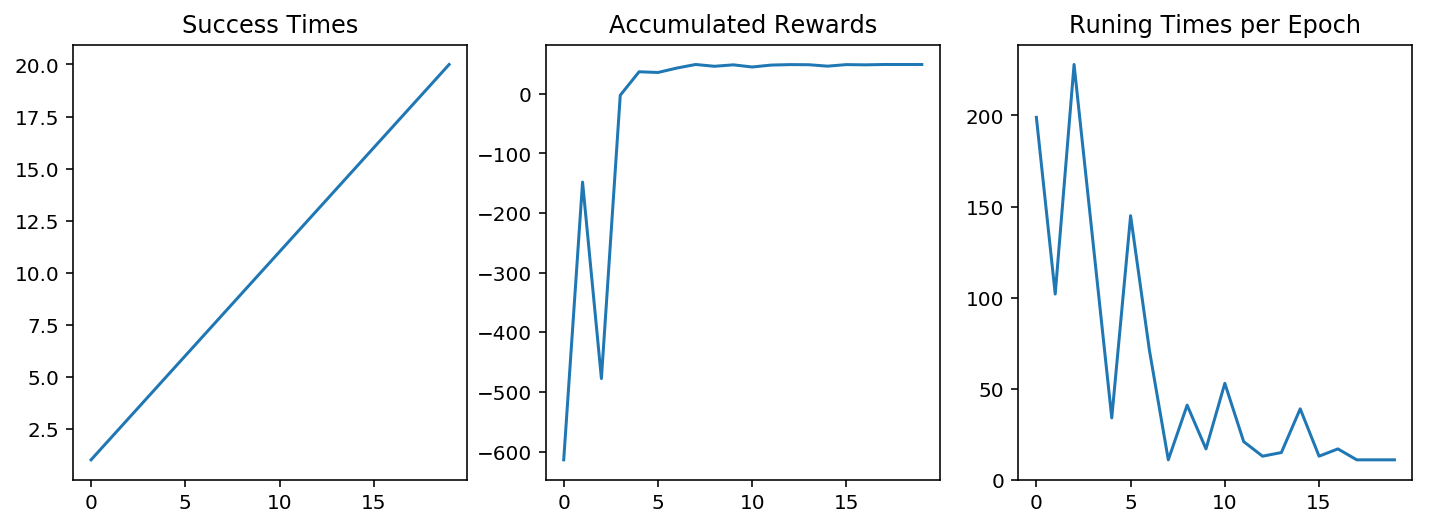

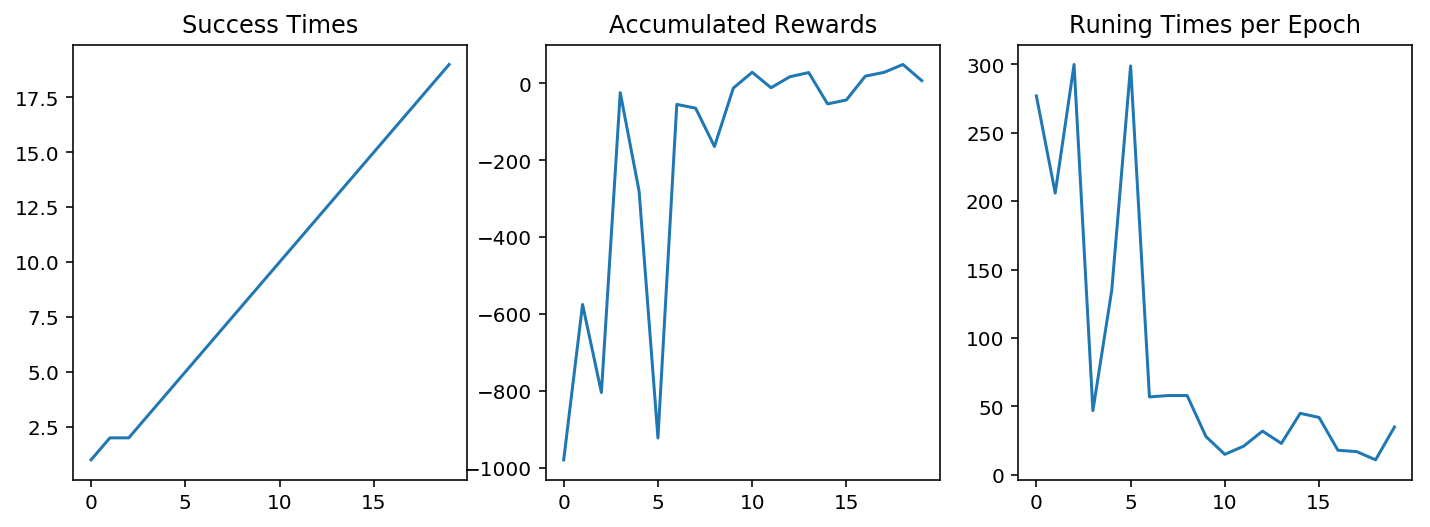

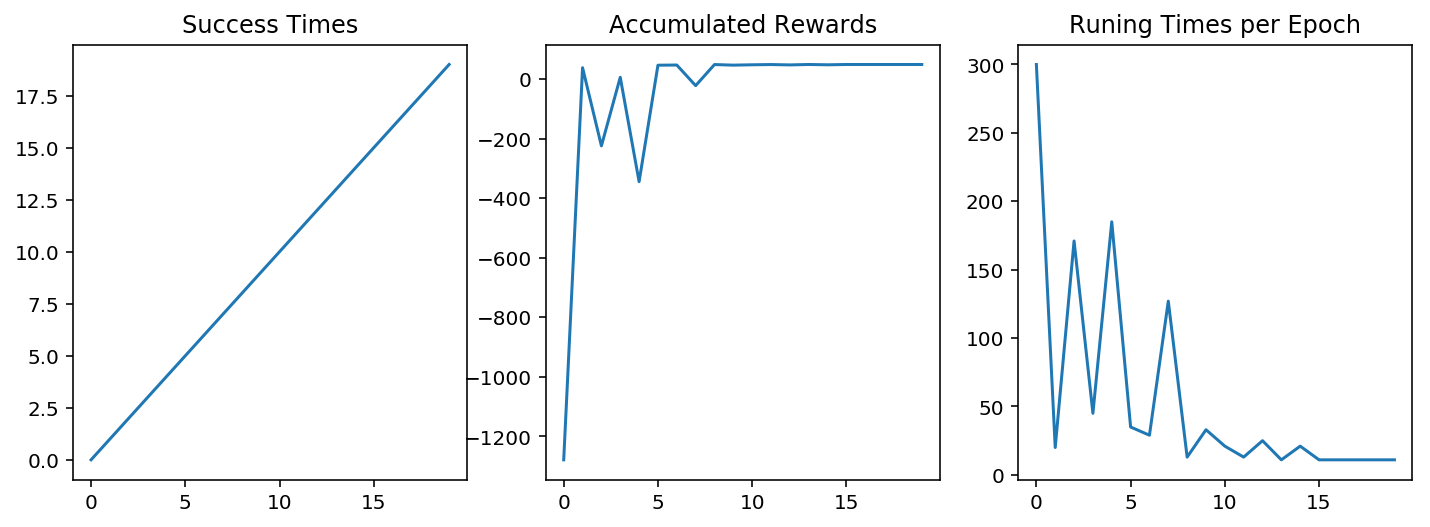

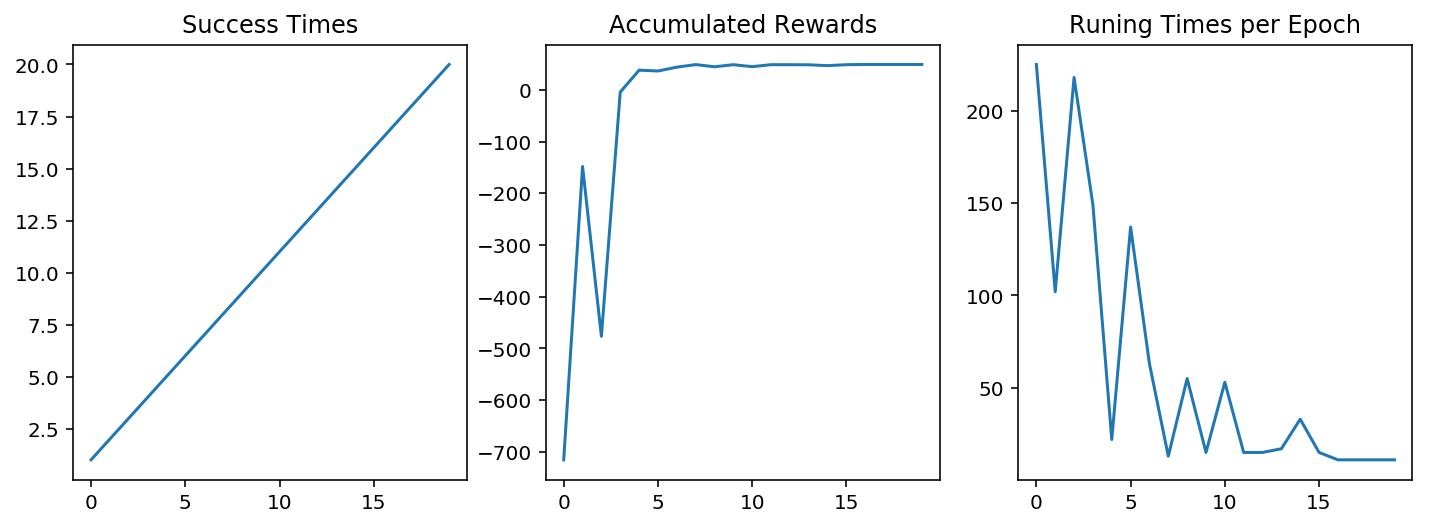

In [72]:
maze = Maze(maze_size=(10, 10), trap_number=3)
run_train(epsilon0=0.5, maze=maze, training_per_epoch=300, epsilon_type='exp', epsilon_atten=0.99)
run_train(epsilon0=0.5, maze=maze, training_per_epoch=300, epsilon_type='exp', epsilon_atten=0.75)
run_train(epsilon0=0.5, maze=maze, training_per_epoch=300, epsilon_type='exp', epsilon_atten=0.5)

run_train(epsilon0=0.5, maze=maze, training_per_epoch=300, epsilon_type='linear', epsilon_atten=0.0001)
run_train(epsilon0=0.5, maze=maze, training_per_epoch=300, epsilon_type='linear', epsilon_atten=0.001)
run_train(epsilon0=0.5, maze=maze, training_per_epoch=300, epsilon_type='linear', epsilon_atten=0.005)

对于epsilon-greedy算法，在训练初期，我们希望随机探索的概率更大，以期在环境中交互获得更多的信息，同时也为了减少初始Q值对行为的错误引导。随着训练过程增多，则需要慢慢减少epsilon，更多的基于学习到的经验来行动。而衰减的方式和参数会对训练过程产生影响。这里我尝试了指数衰减和线性衰减，以及两种衰减不同参数。从曲线对比可以看出，指数衰减要优于线性衰减，当衰减率为0.99时，效果最佳。

而超参数epoch跟training_per_epoch类似，只要足够保证训练最终能够收敛即可，无需做太多调整。

* 我对以下超参数进行了调参：迷宫大小maze_size，陷阱个数trap_number，训练阶段数epoch，每阶段训练次数上限training_per_epoch，松弛变量alpha，奖励折扣因子gamma，epsilon-greedy算法中的初始epsilon0，以及衰减方式epsilon_type衰减系数epsilon_atten。具体分析参见以上各个小节。
* 最终比较理想的超参数取值是：epoch=20, maze_size = (10,10), trap_number = 3, training_per_epoch=300, epsilon0=0.5, alpha=0.9, gamma=0.9, epsilon_type='exp', epsilon_atten=0.99。
* 我对训练的结果基本满意，有一个改进计划是Q值的初始化问题。在当前版本的实现中，Q值均初始化为0，这样会导致在训练初期如果没有随机探索，max行为会选择同一个：max(qline, key=lambda x: qline[x])，可以考虑改成初始化为均匀或正态分布，甚至根据地图信息生成更理想的初始值。
* 值得一提的是，由于地图及地图上的元素是随机生成的，多次运行结果可能会有所出入。

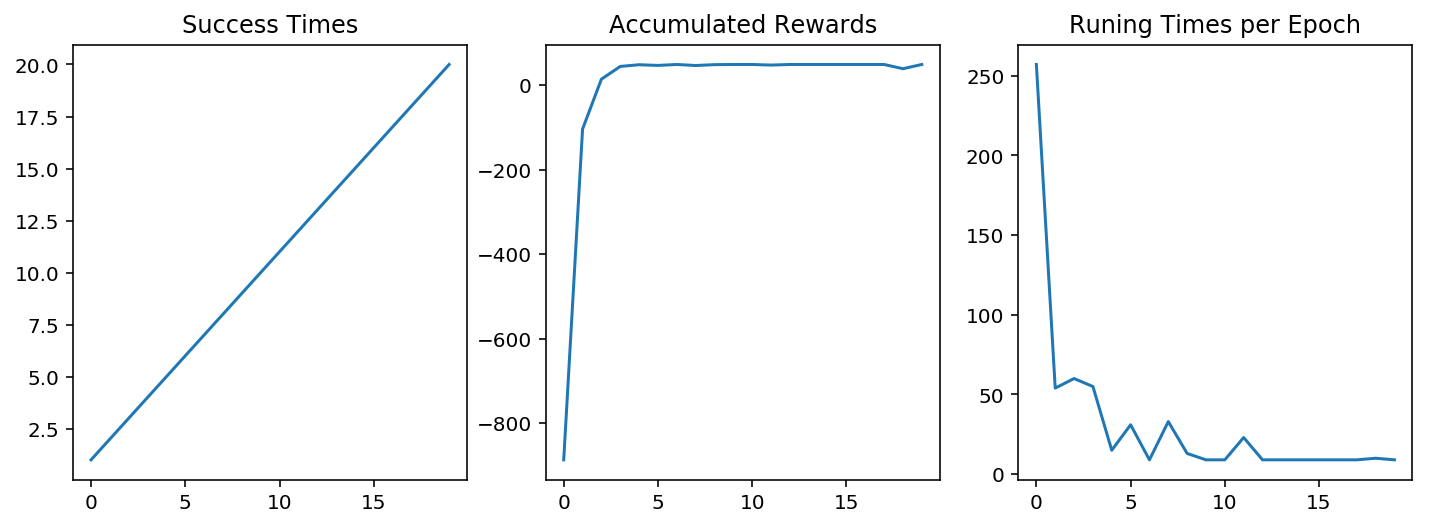

In [75]:
run_train(epoch=20, maze_size = (10,10), trap_number = 3, training_per_epoch=300, epsilon0=0.5, alpha=0.9, gamma=0.9, epsilon_atten=0.99, epsilon_type='exp')

---

**问题 9：** 请将如下的文件打包，提交文件给审阅者。

- `robot.py`
- `robot_maze.ipynb`
- 由 `robot_maze.ipynb` 导出的 `robot_maze.html`